1001
dat/1001


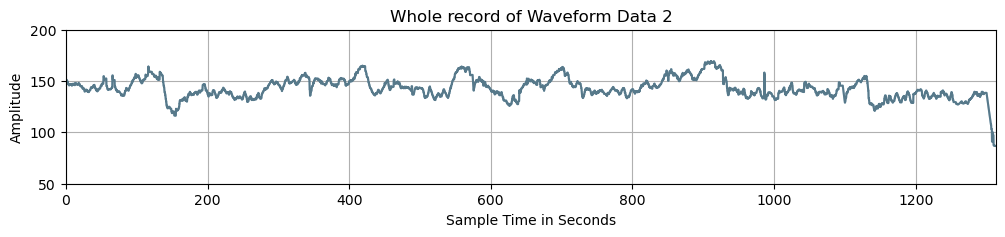

dat/1002


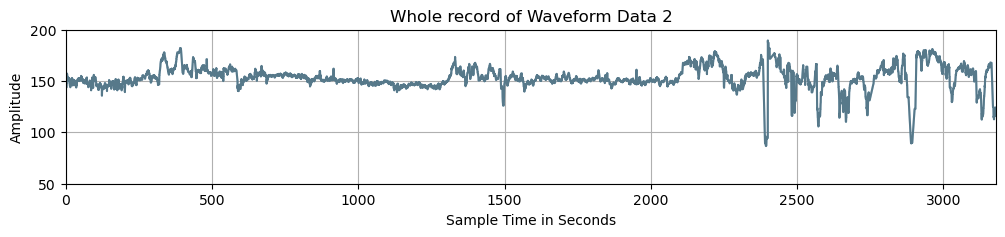

dat/1003


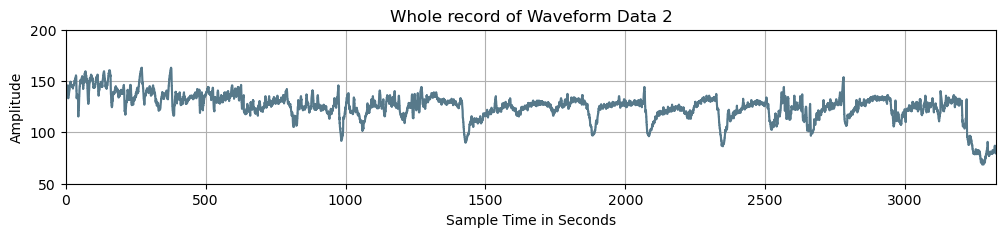

dat/1004


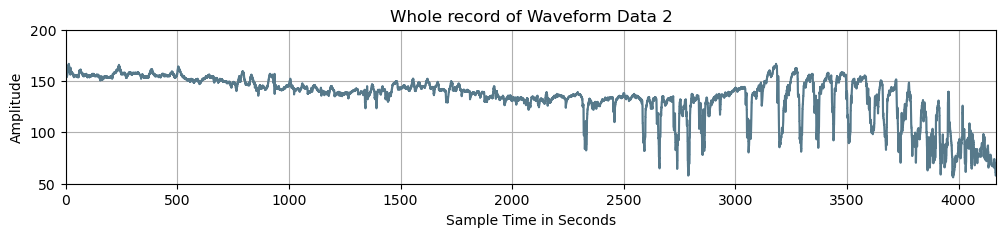

dat/1005


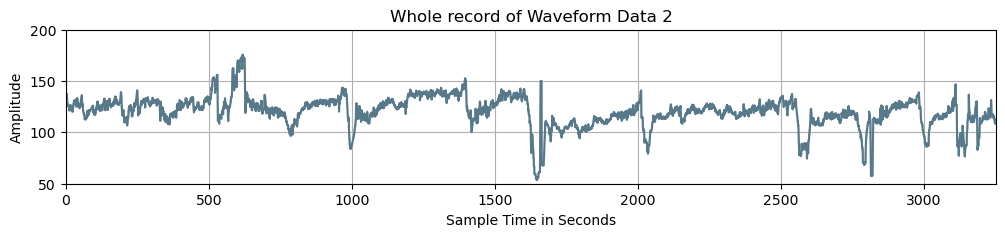

dat/1006


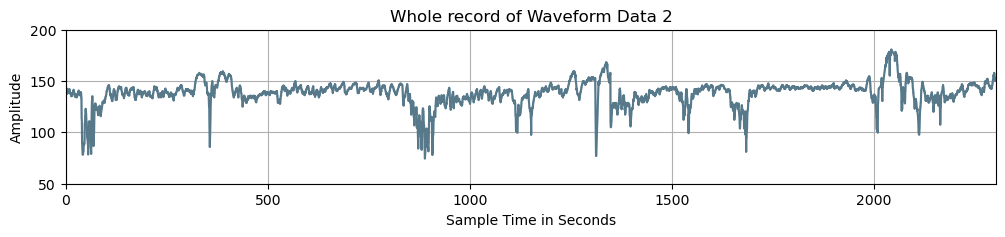

dat/1007


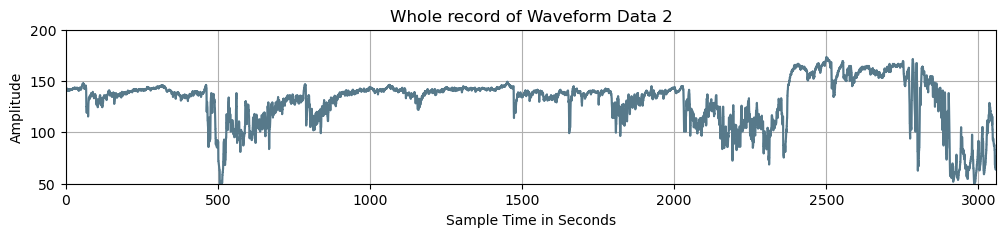

dat/1008


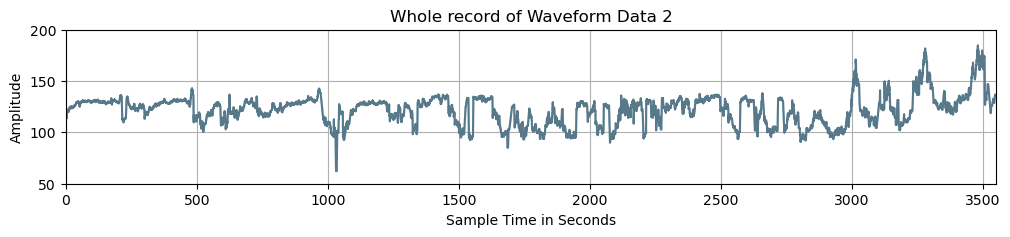

dat/1009


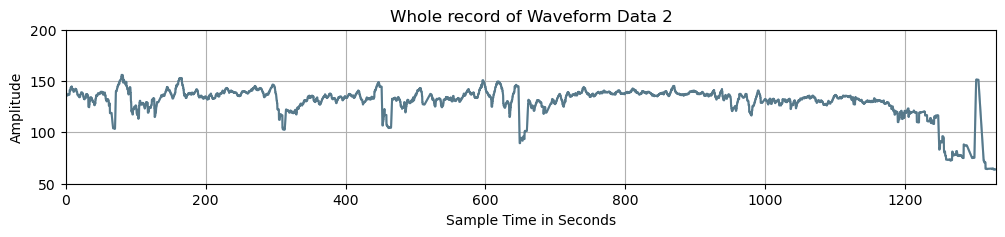

dat/1010


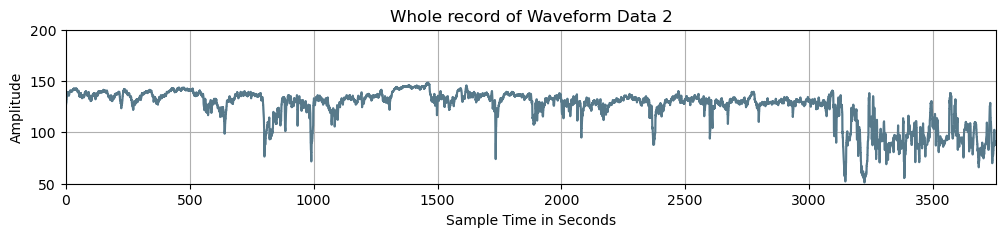

dat/1011


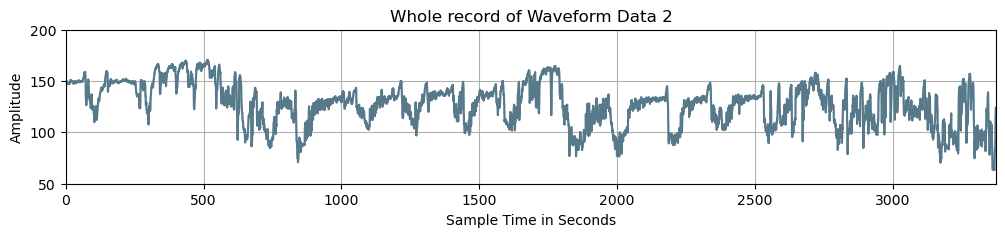

dat/1012


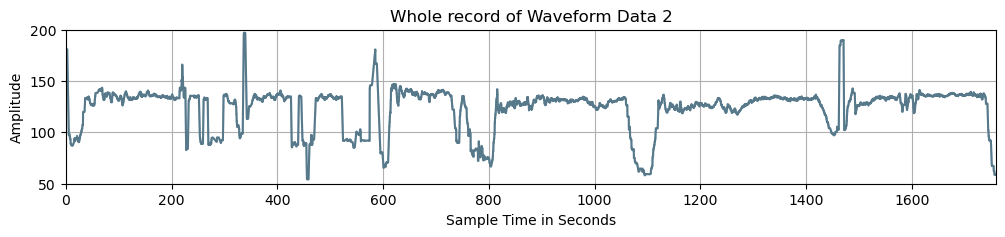

dat/1013


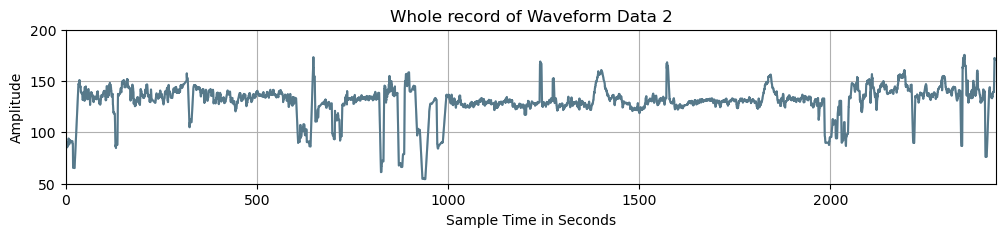

dat/1014


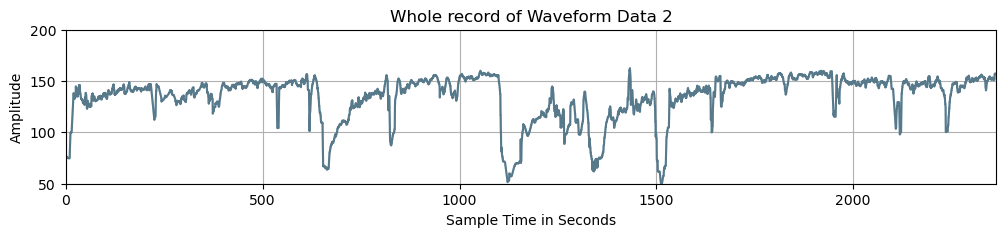

dat/1015


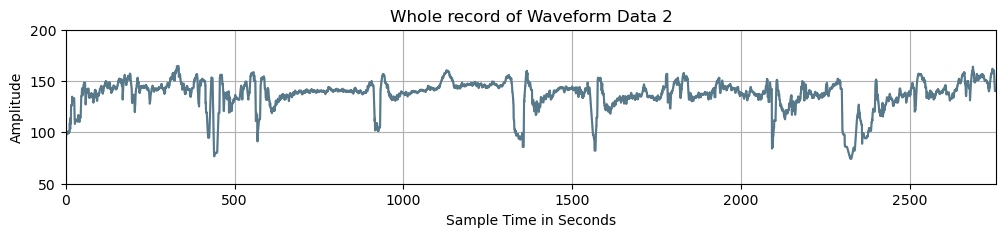

dat/1016


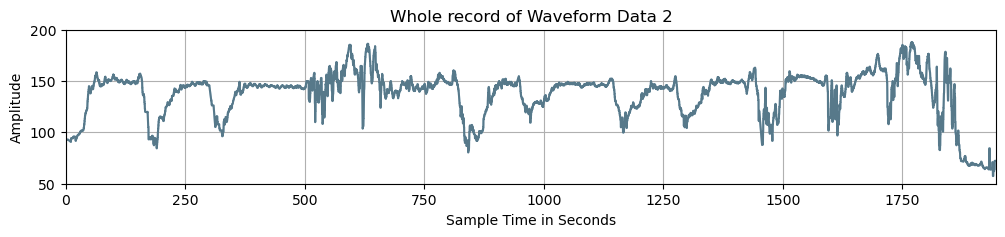

dat/1017


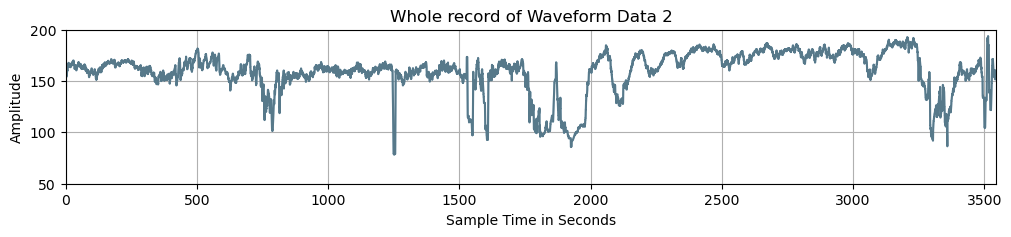

dat/1018


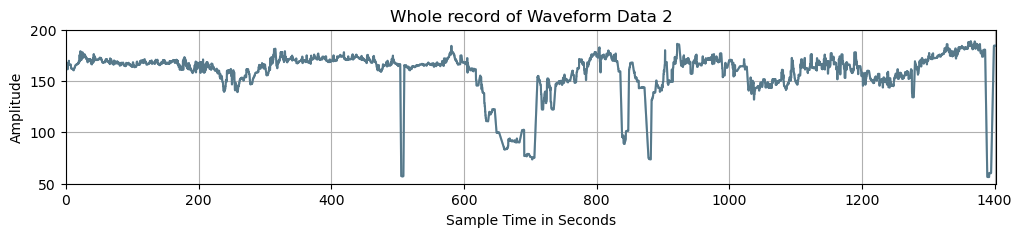

dat/1019


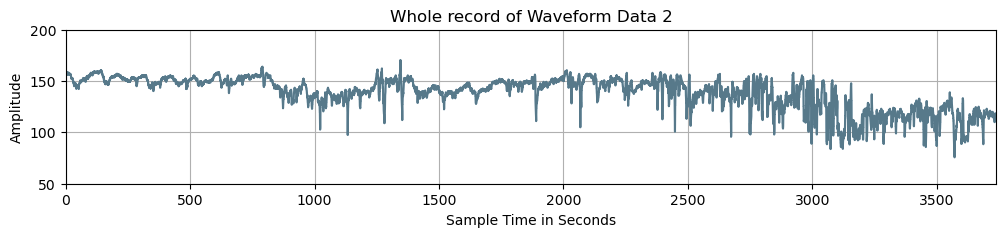

dat/1020


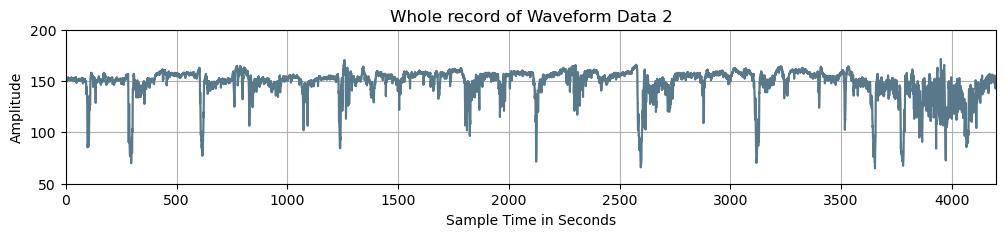

dat/1021


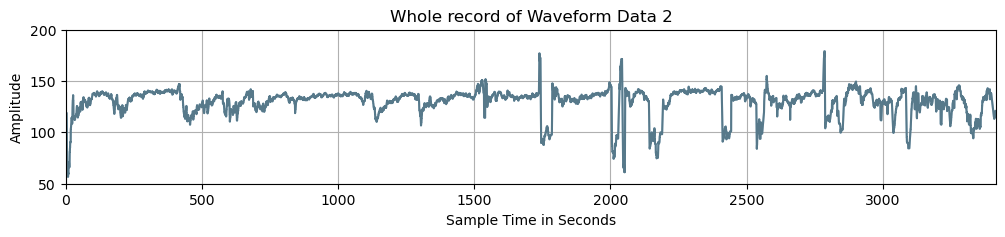

dat/1022


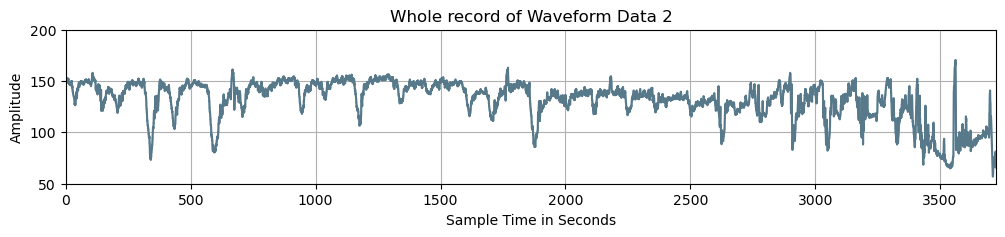

dat/1023


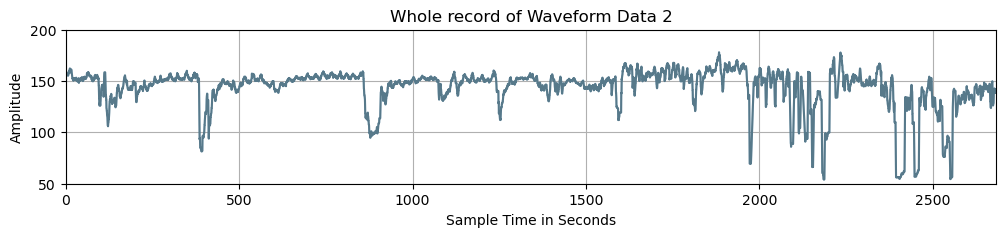

dat/1024


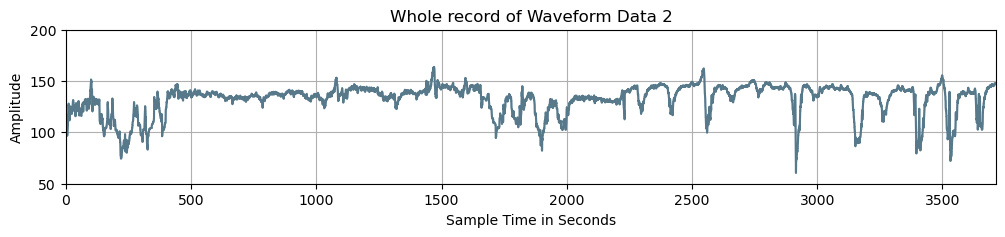

dat/1025


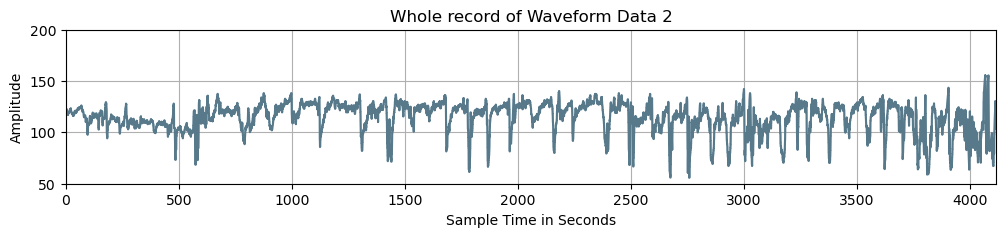

dat/1026


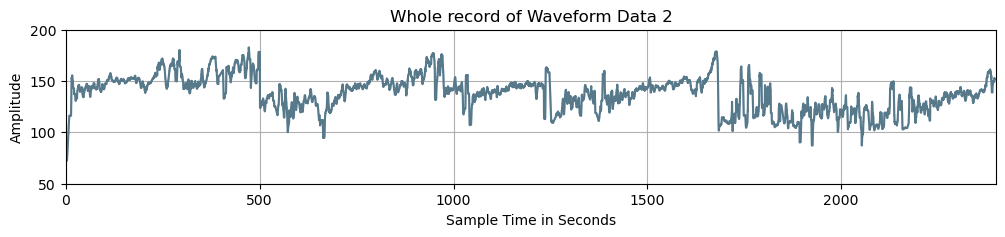

dat/1027


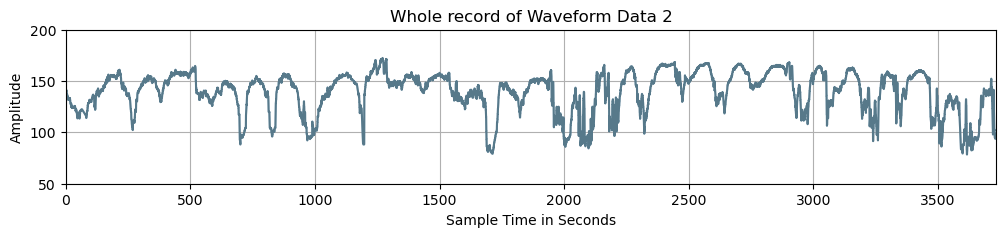

dat/1028


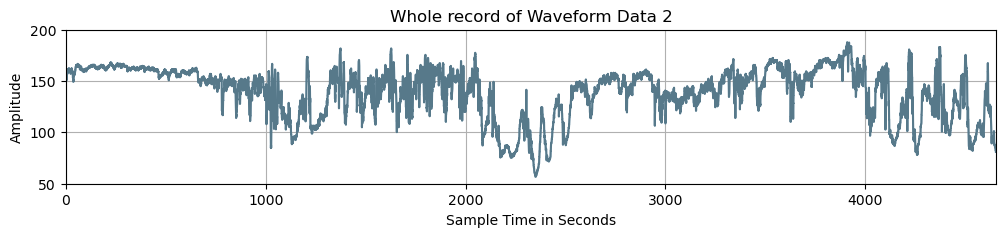

dat/1029


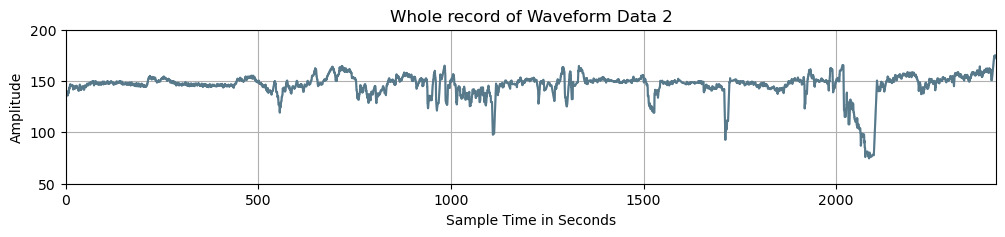

dat/1030


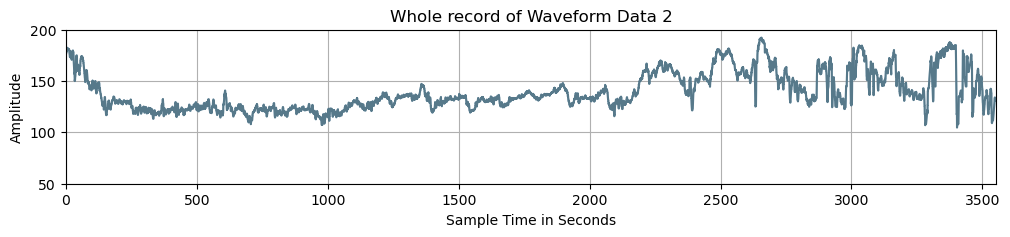

dat/1031


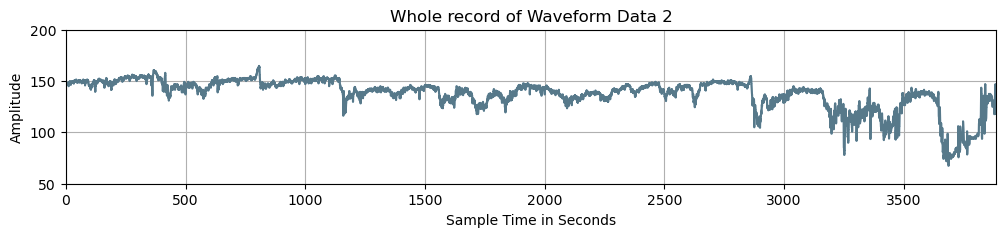

dat/1032


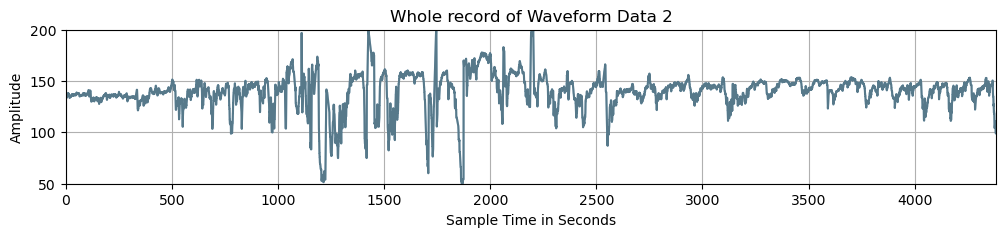

dat/1033


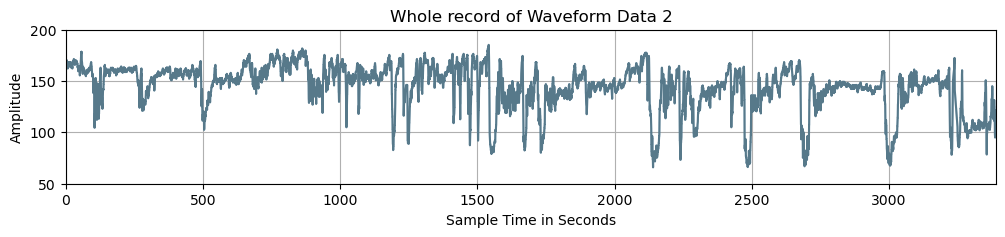

dat/1034


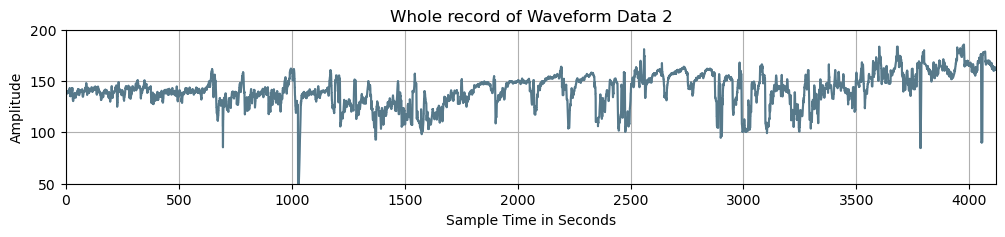

dat/1035


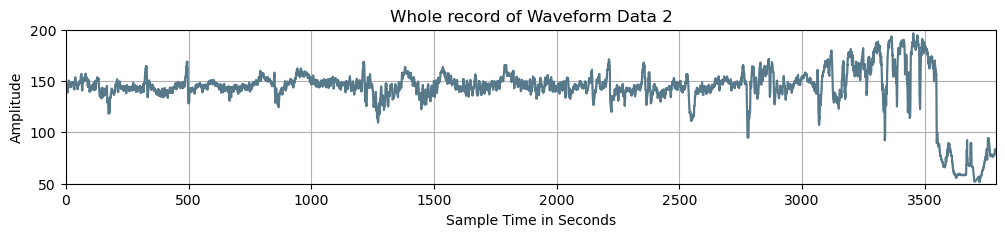

dat/1036


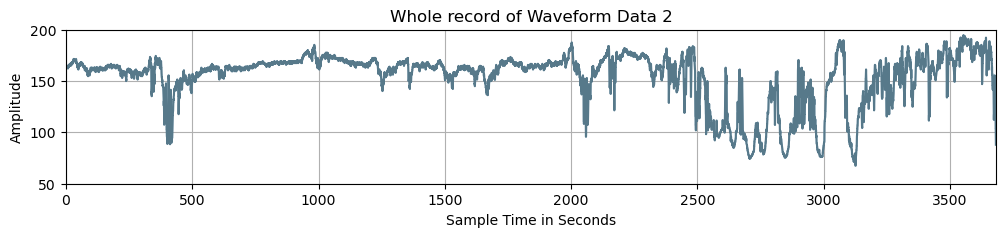

dat/1037


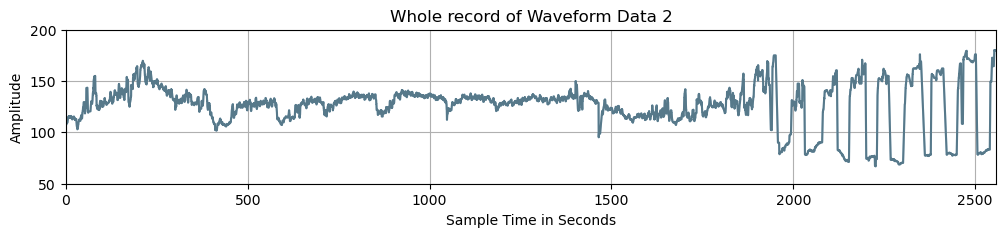

dat/1038


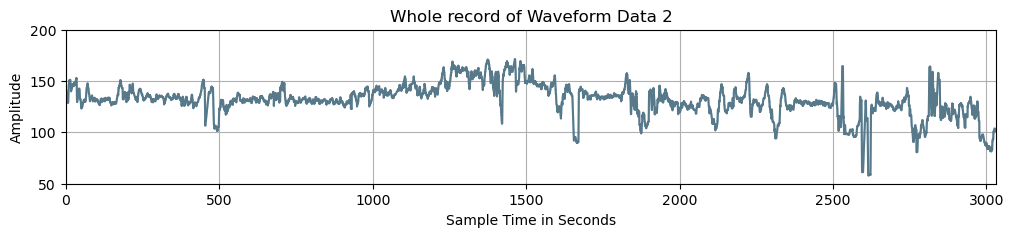

dat/1039


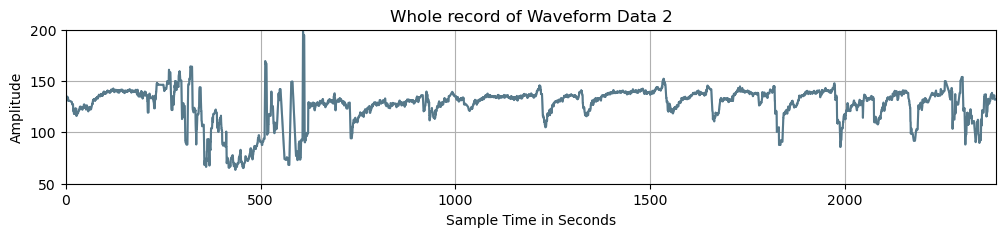

dat/1040


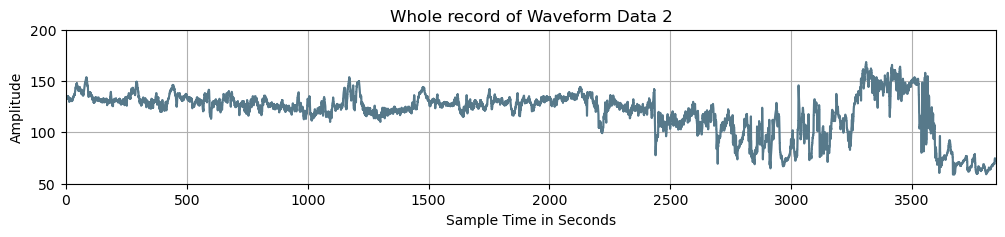

dat/1041


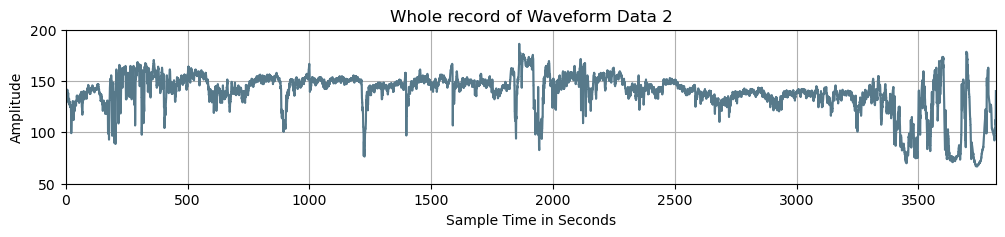

dat/1042


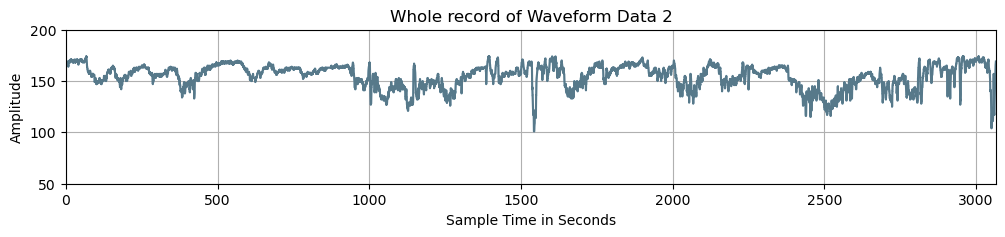

dat/1043


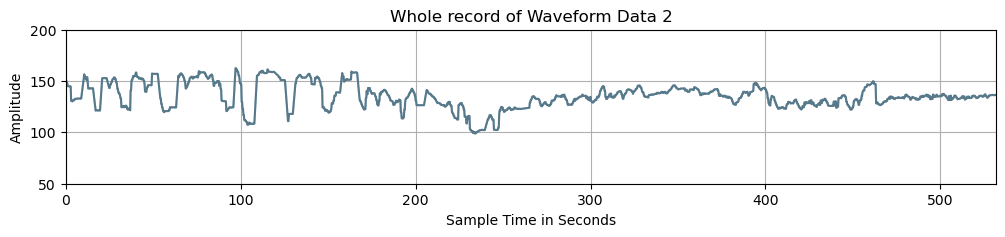

dat/1044


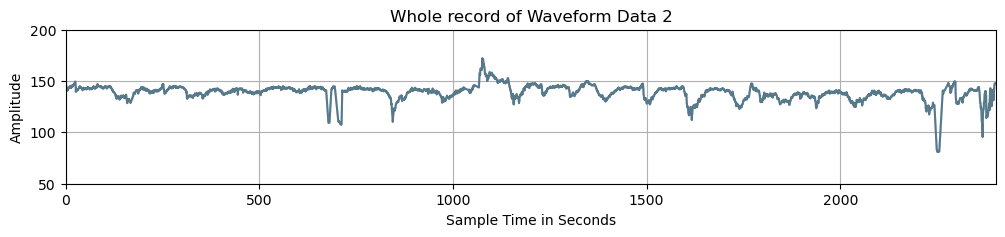

dat/1045


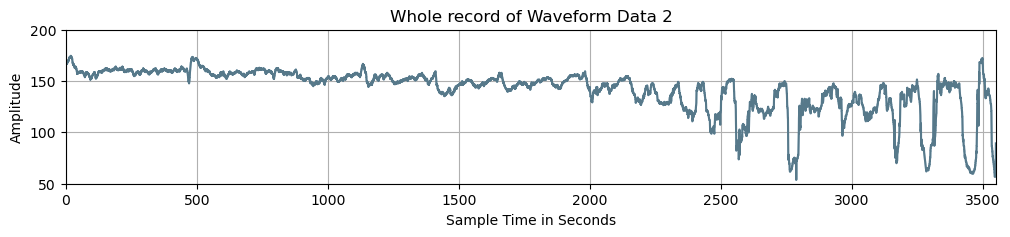

dat/1046


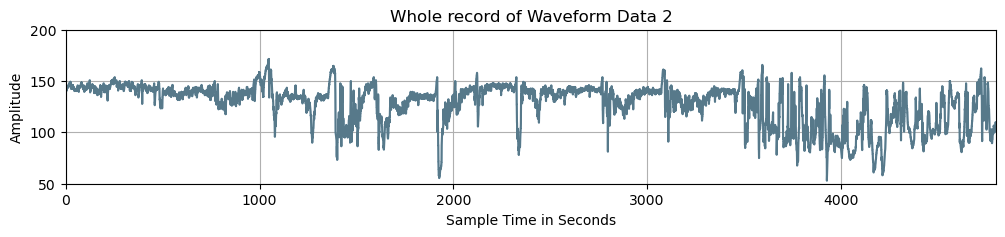

dat/1047


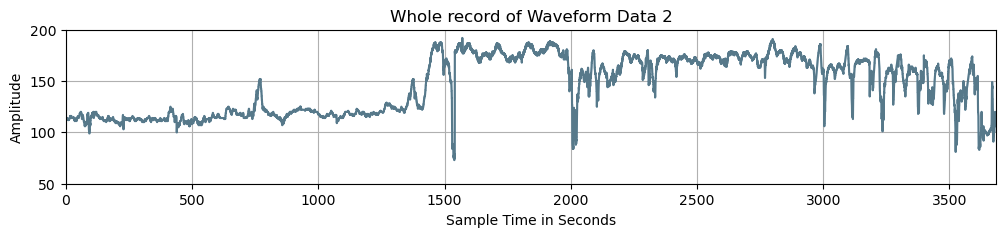

dat/1048


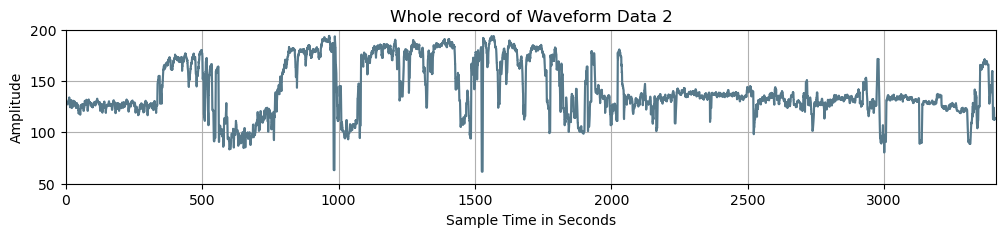

dat/1049


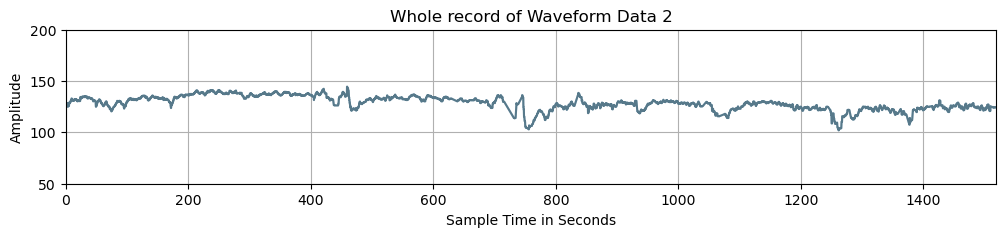

dat/1050


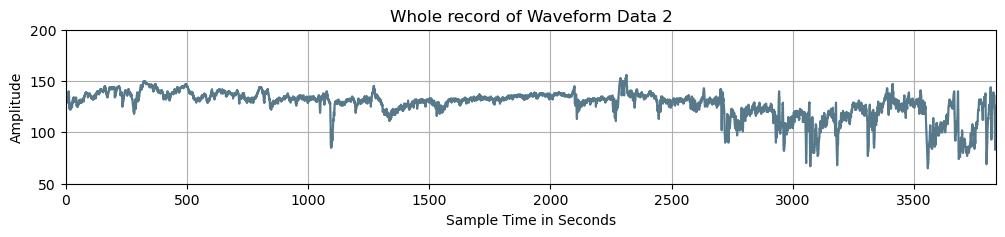

dat/1051


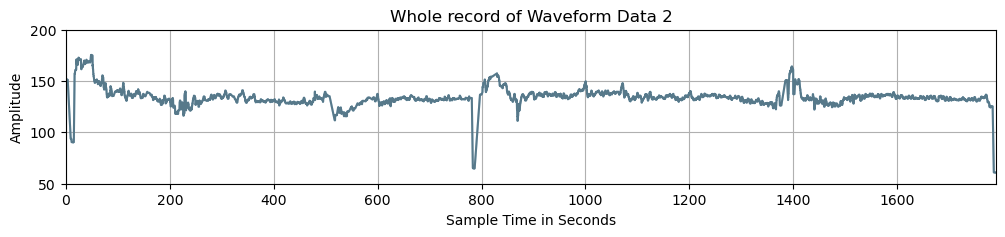

dat/1052


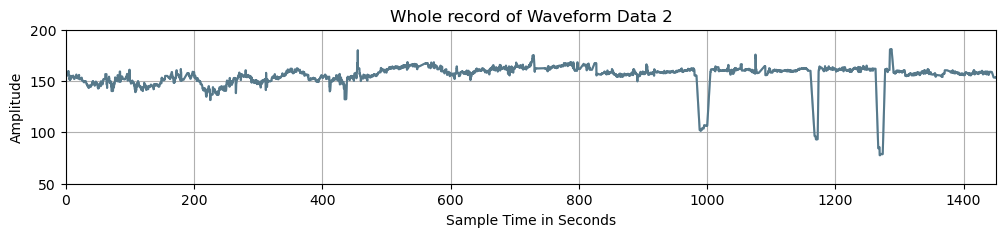

dat/1053


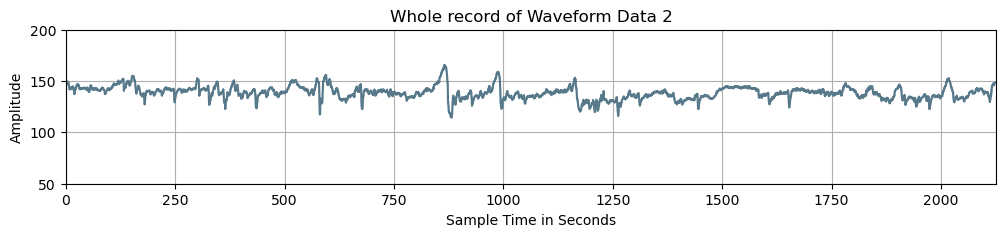

dat/1054


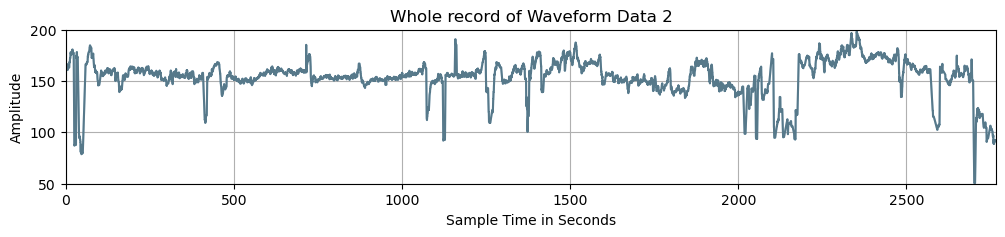

dat/1055


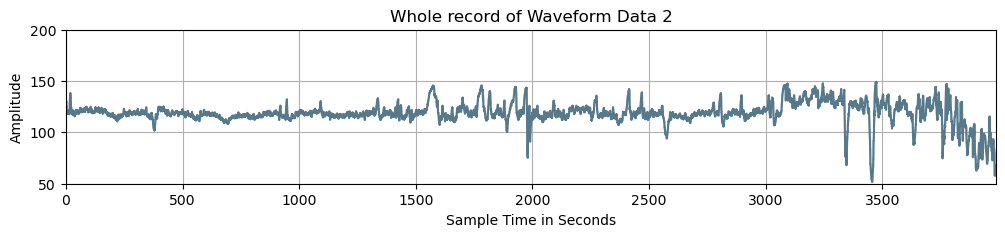

dat/1056


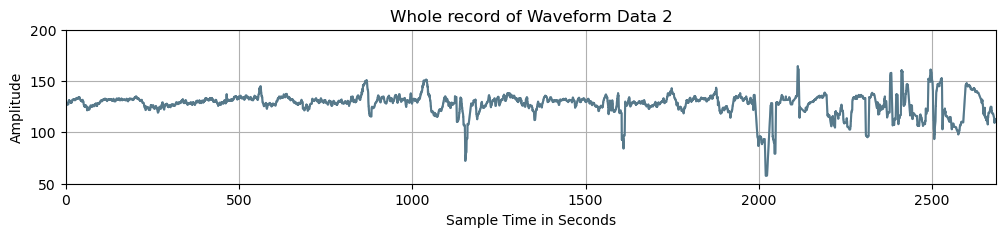

dat/1057


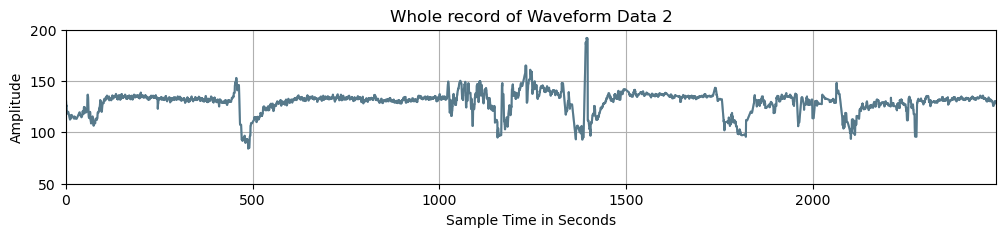

dat/1058


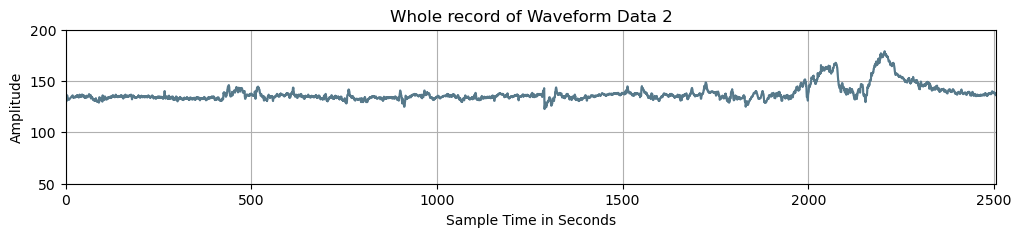

dat/1059


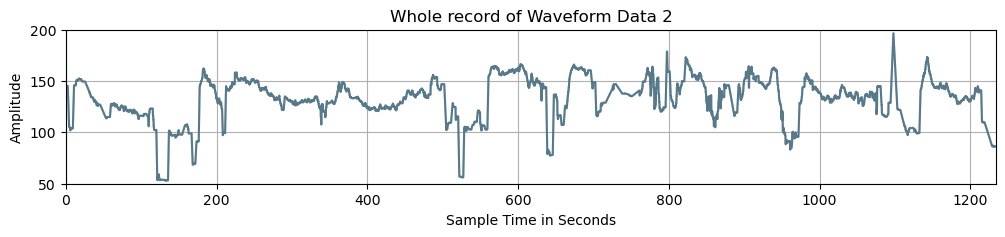

dat/1060


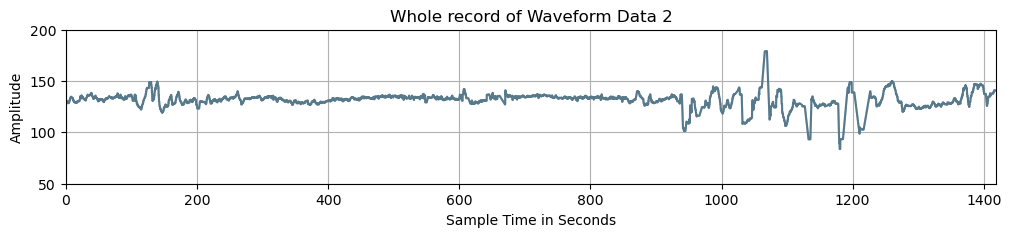

dat/1061


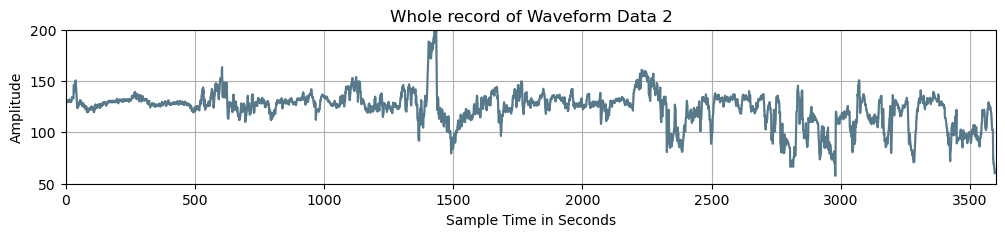

dat/1062


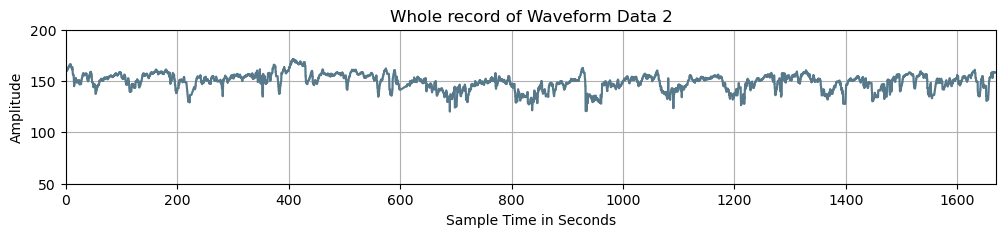

dat/1063


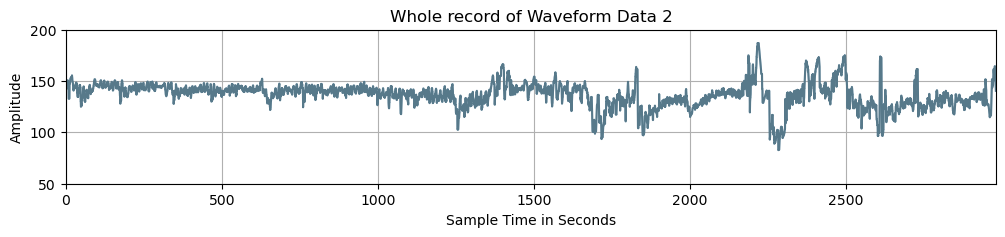

dat/1064


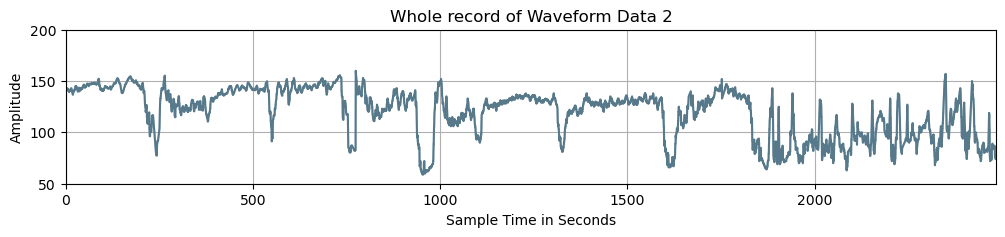

dat/1065


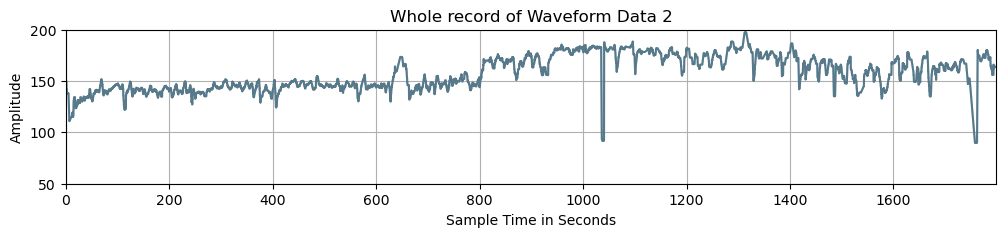

dat/1066


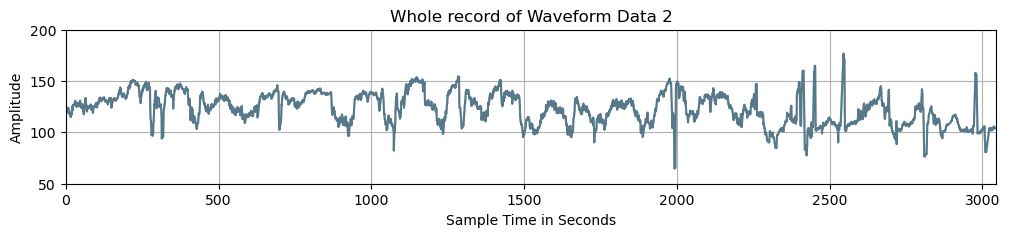

dat/1067


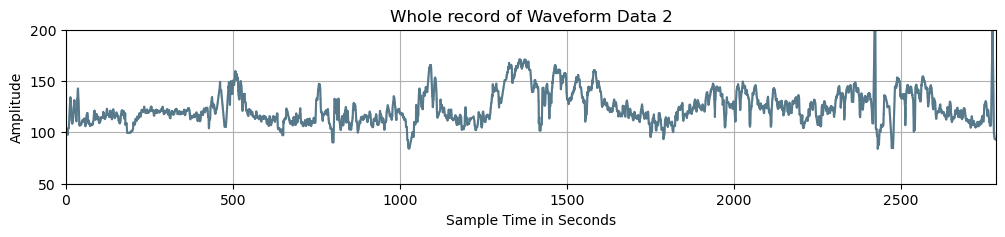

dat/1068


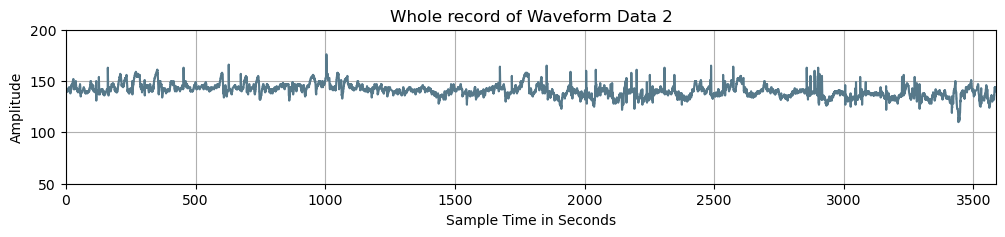

dat/1069


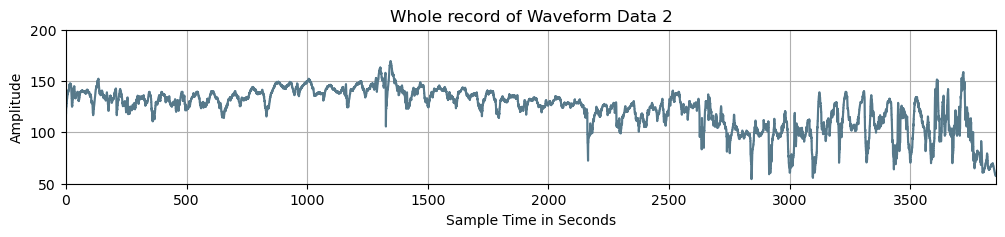

dat/1070


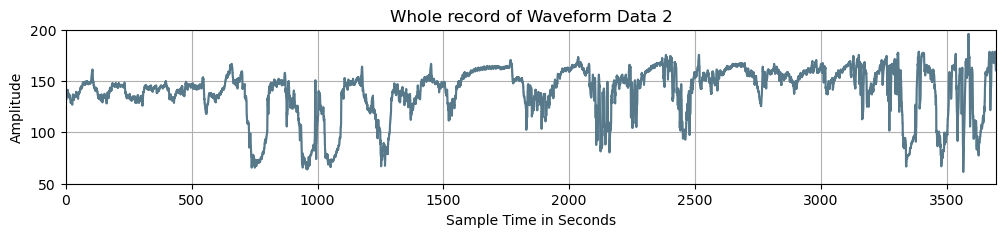

dat/1071


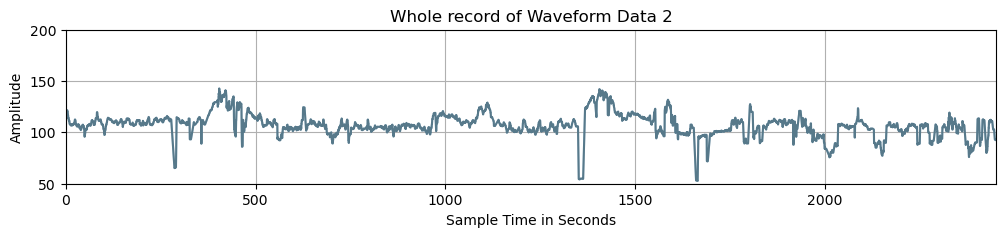

dat/1072


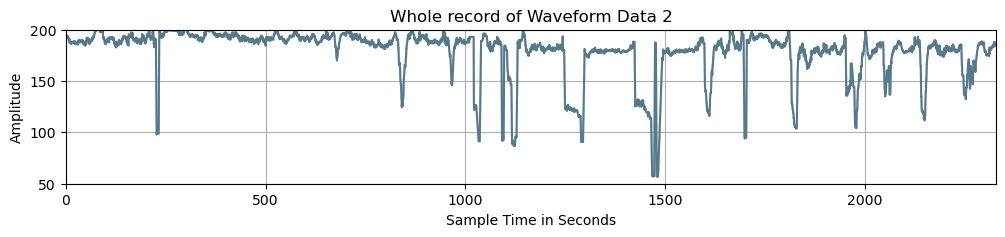

dat/1073


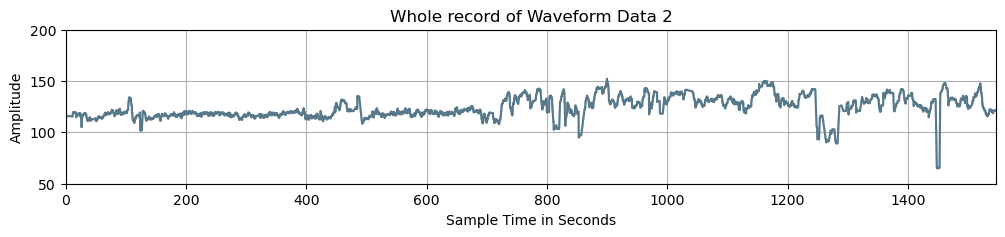

dat/1074


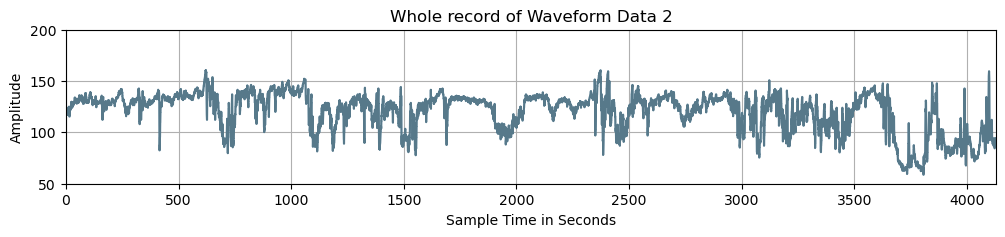

dat/1075


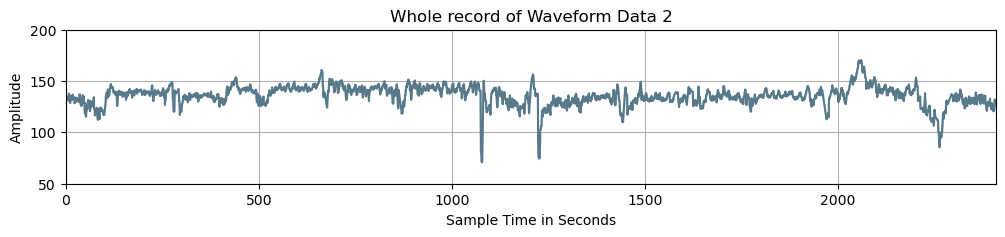

dat/1076


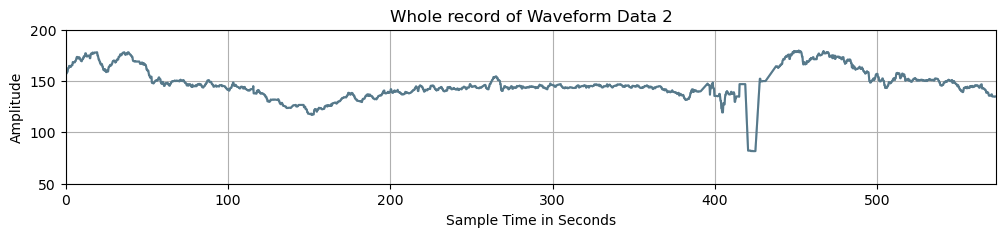

dat/1077


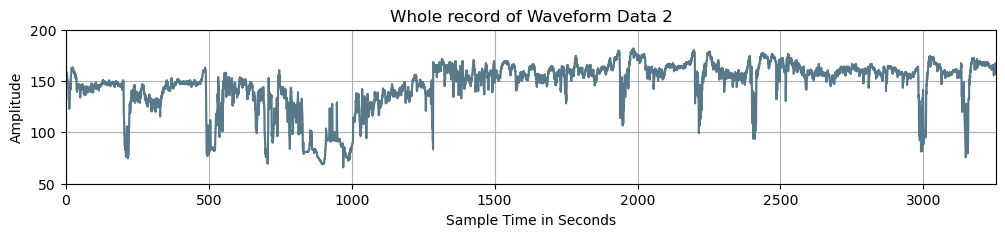

dat/1078


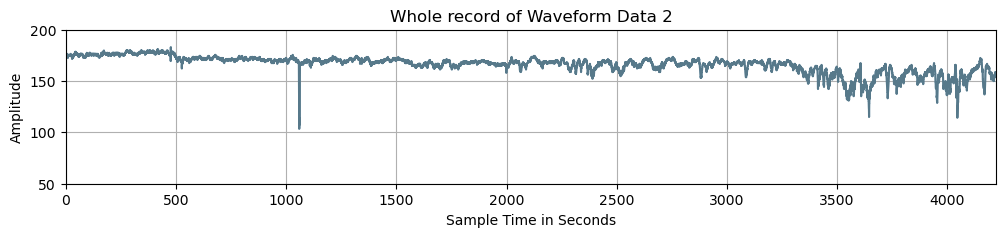

dat/1079


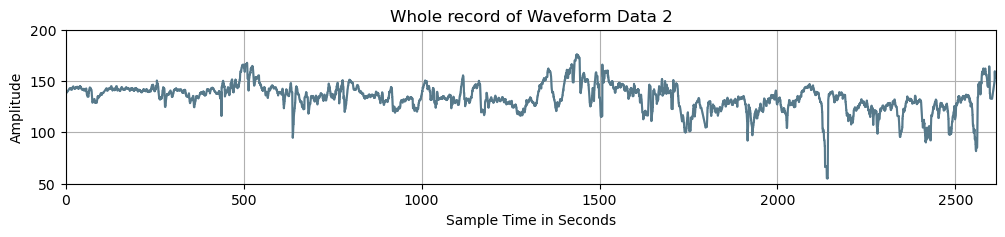

dat/1080


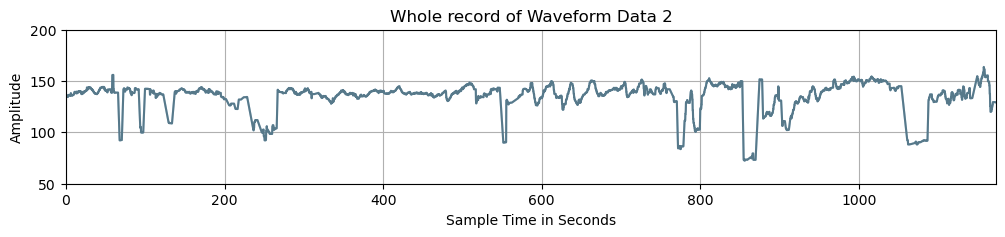

dat/1081


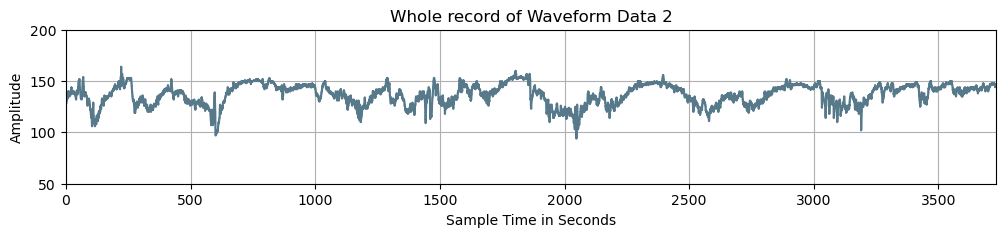

dat/1082


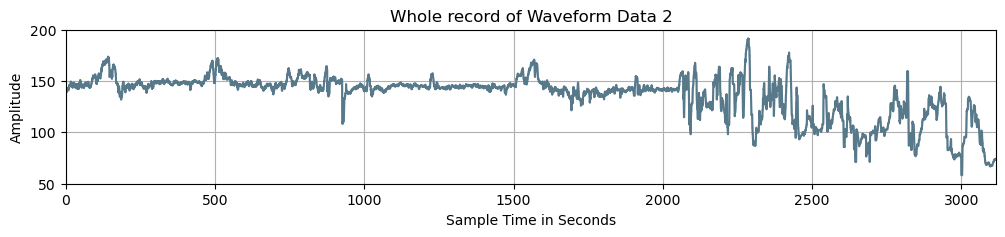

dat/1083


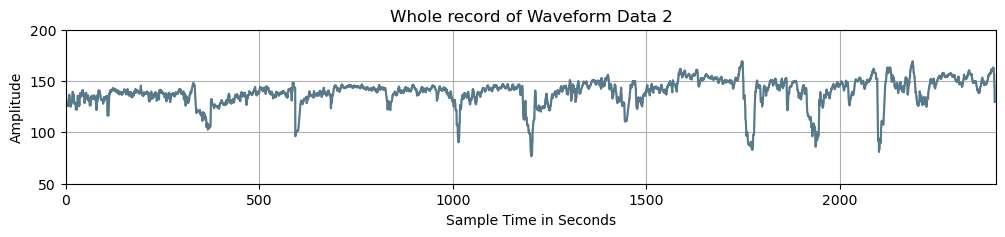

dat/1084


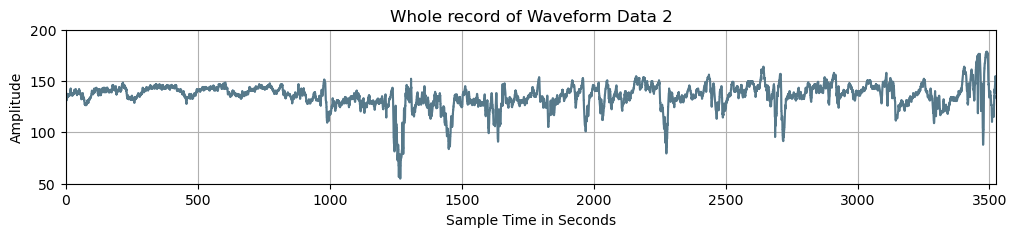

dat/1085


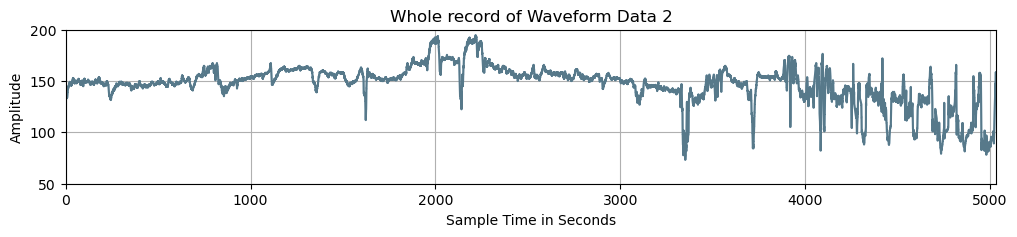

dat/1086


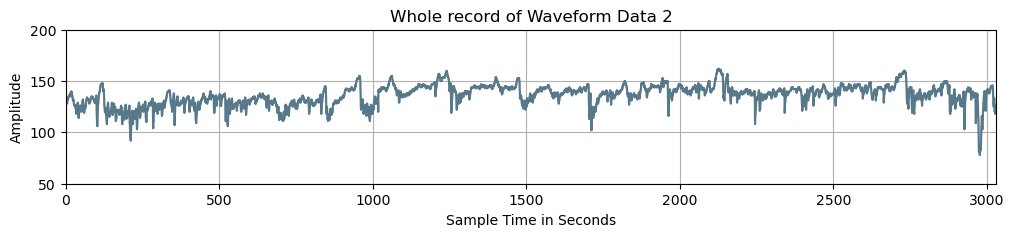

dat/1087


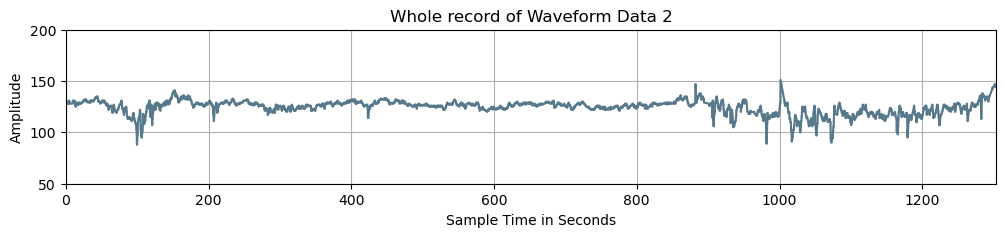

dat/1088


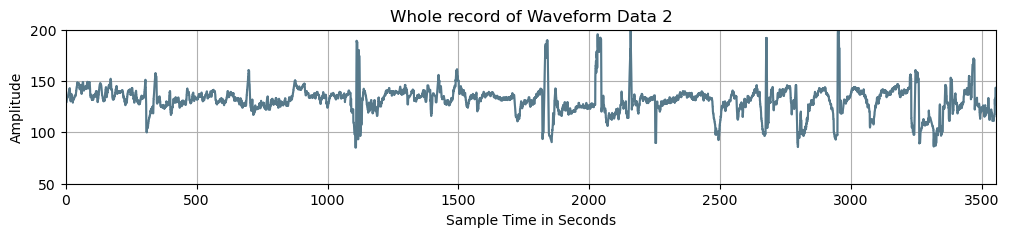

dat/1089


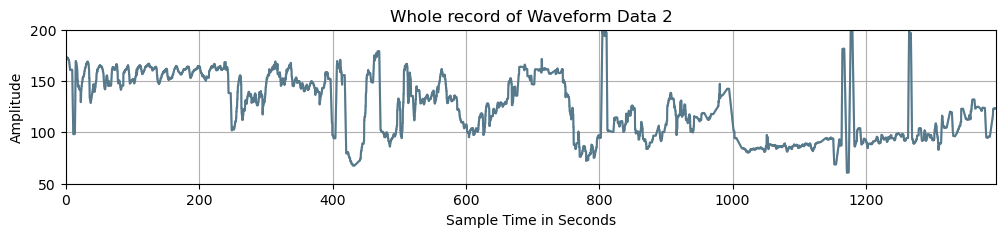

dat/1090


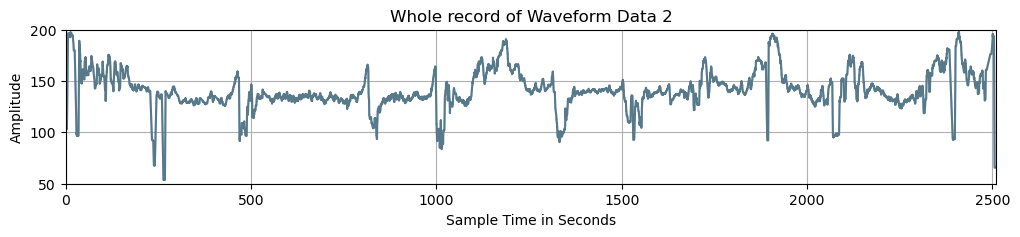

dat/1091


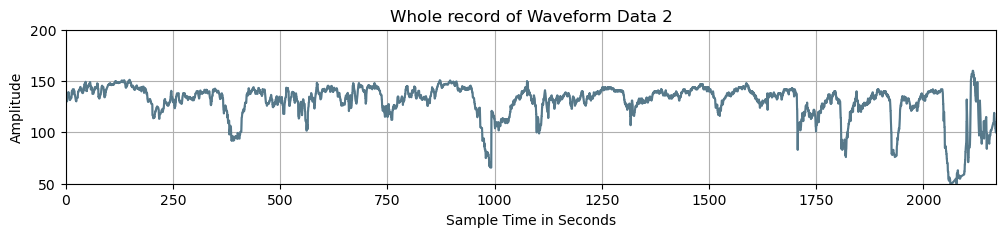

dat/1092


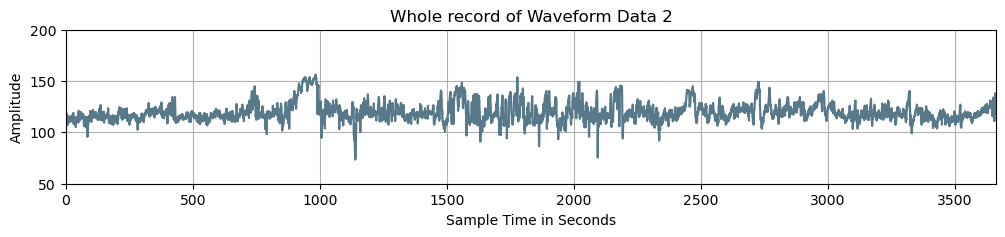

dat/1093


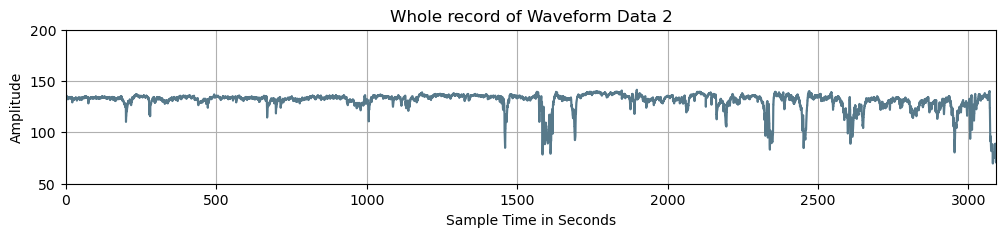

dat/1094


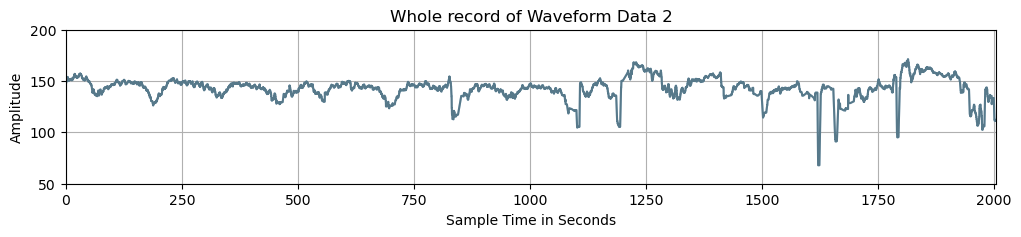

dat/1095


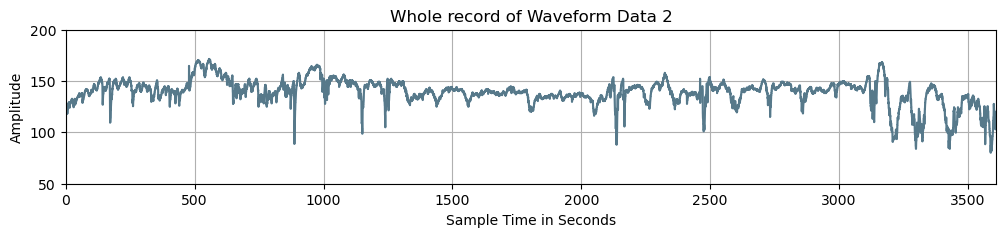

dat/1096


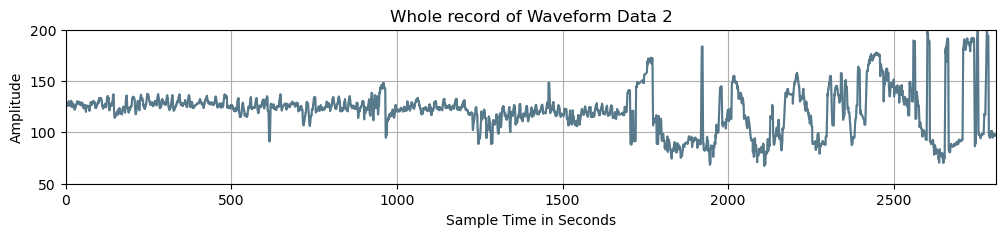

dat/1097


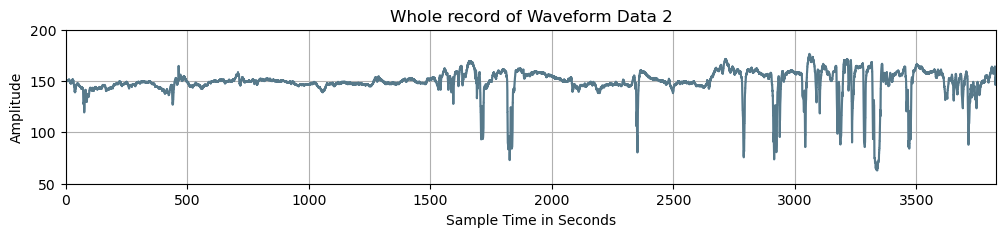

dat/1098


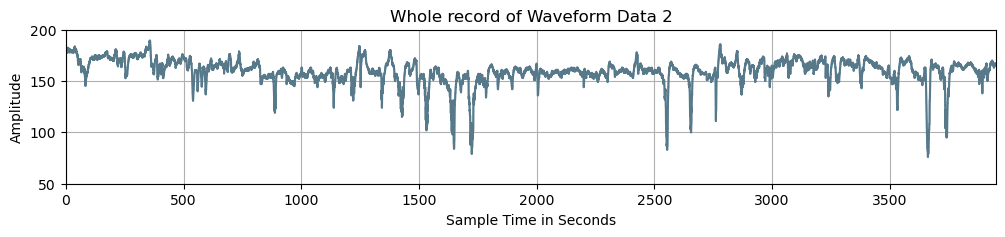

dat/1099


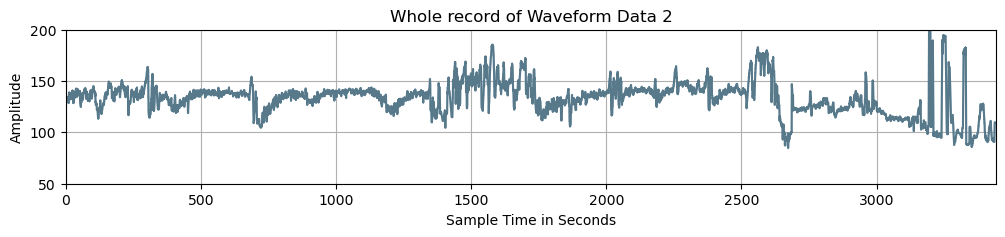

dat/1100


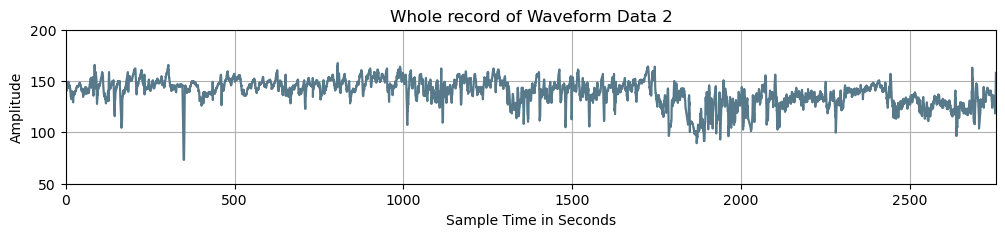

dat/1101


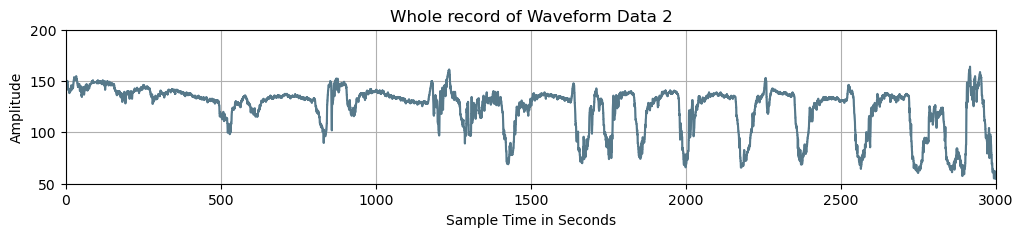

dat/1102


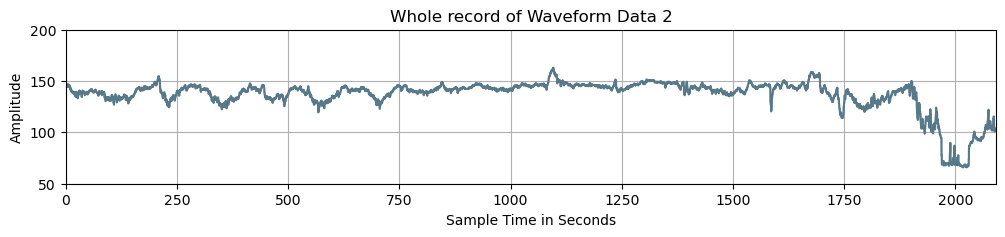

dat/1103


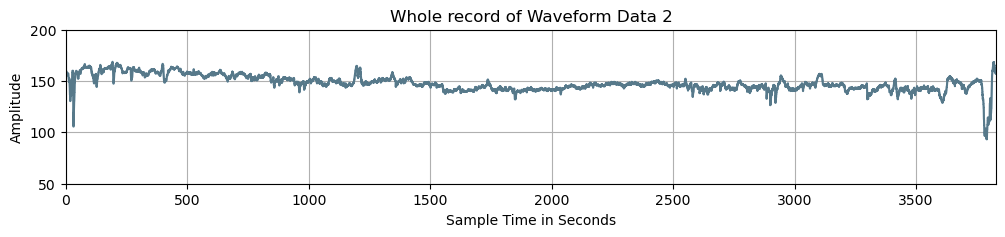

dat/1104


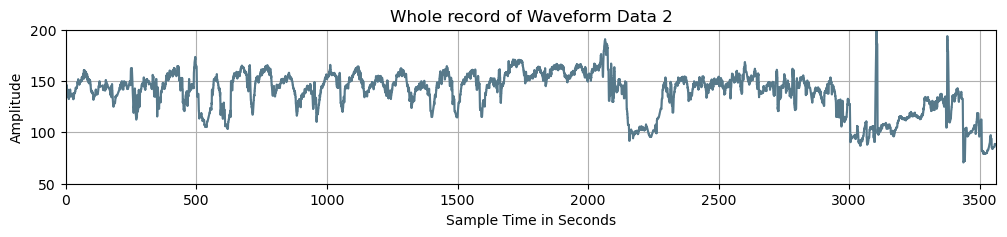

dat/1105


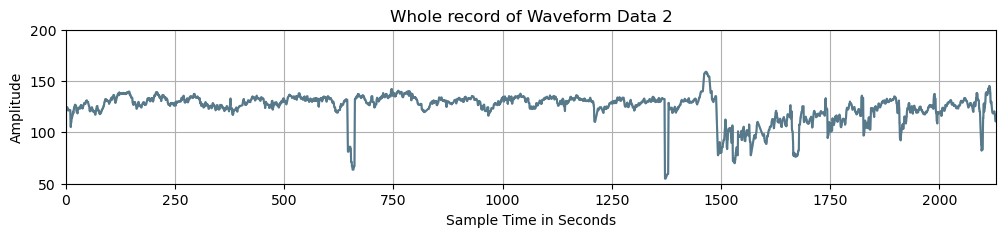

dat/1106


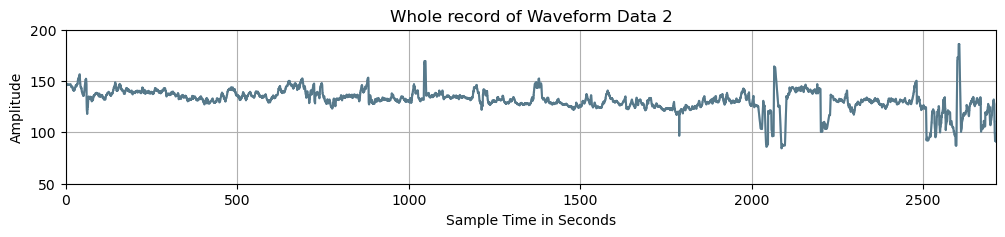

dat/1107


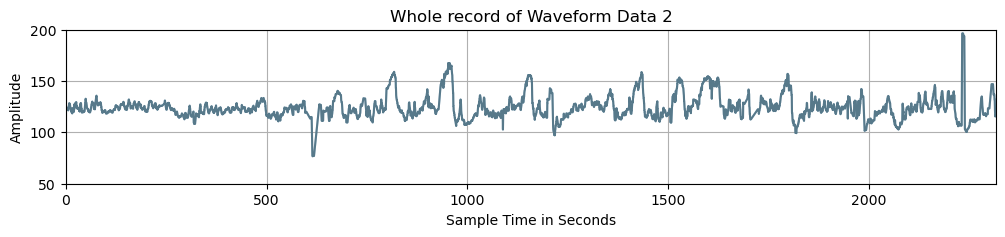

dat/1108


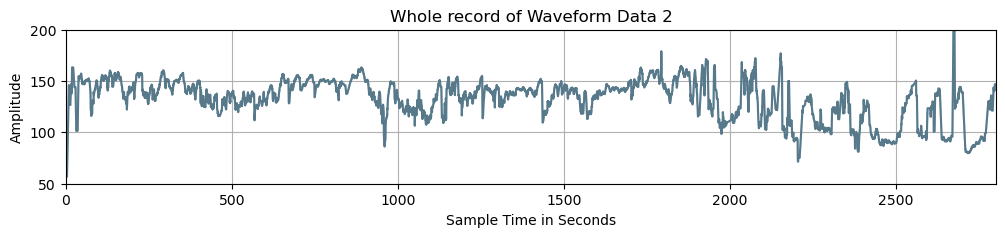

dat/1109


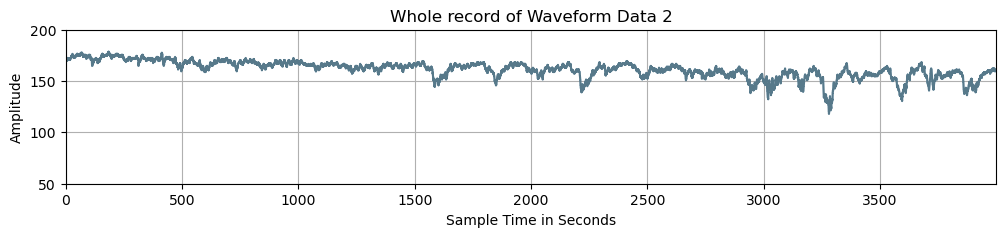

dat/1110


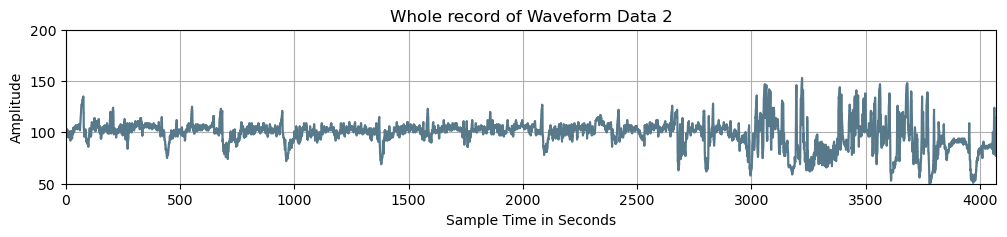

dat/1111


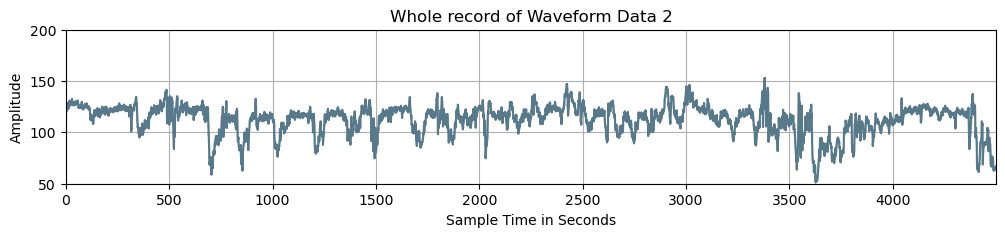

dat/1112


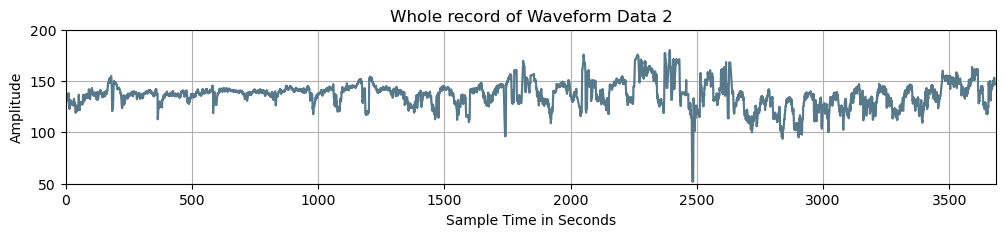

dat/1113


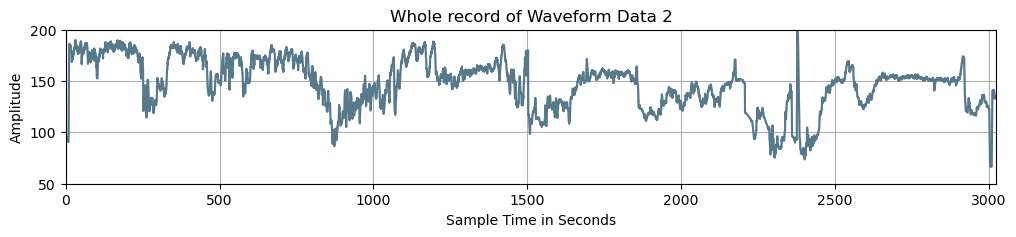

dat/1114


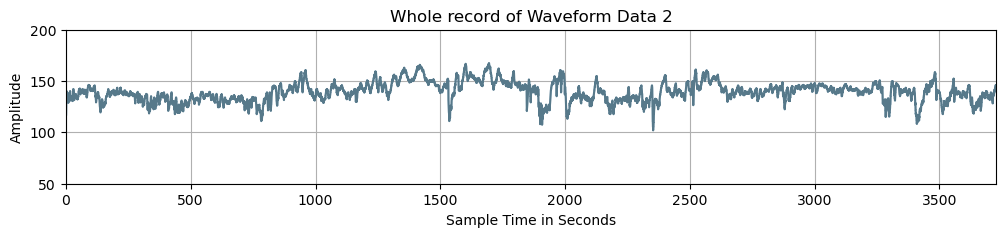

dat/1115


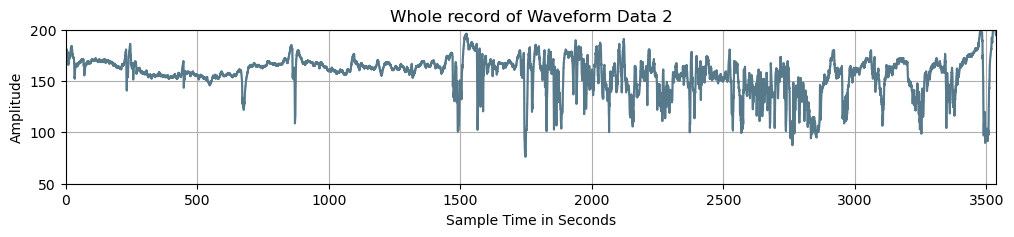

dat/1116


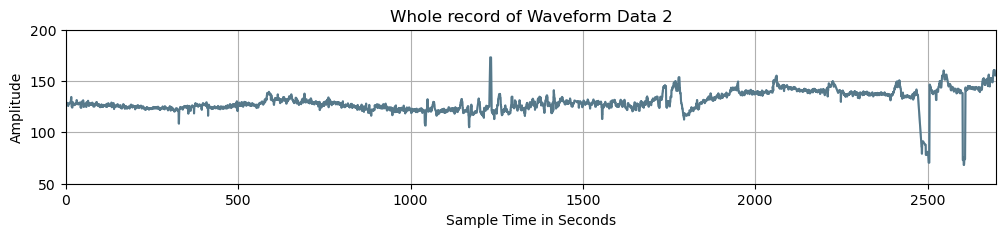

dat/1117


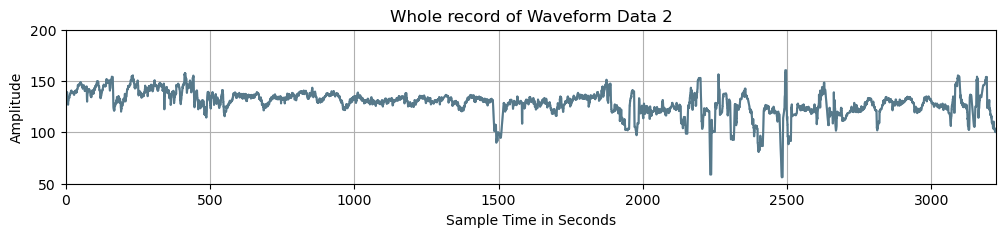

dat/1118


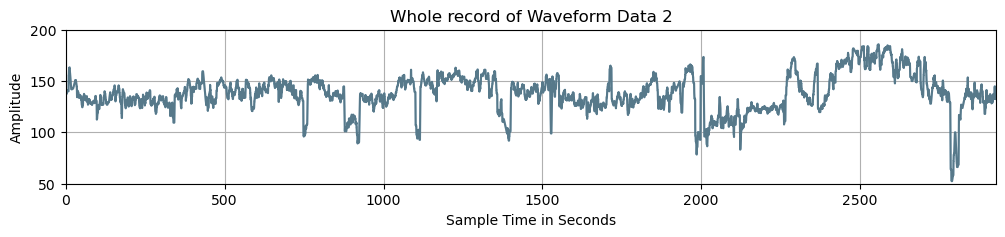

dat/1119


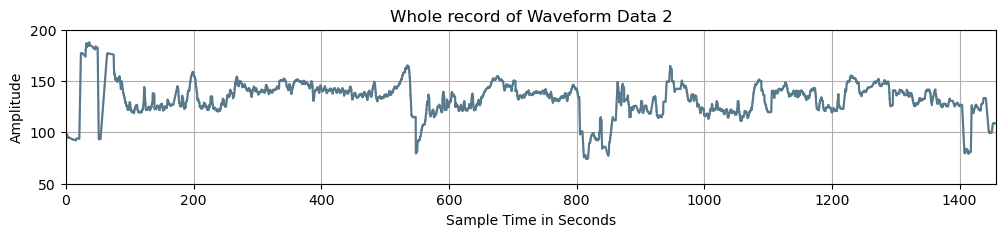

dat/1120


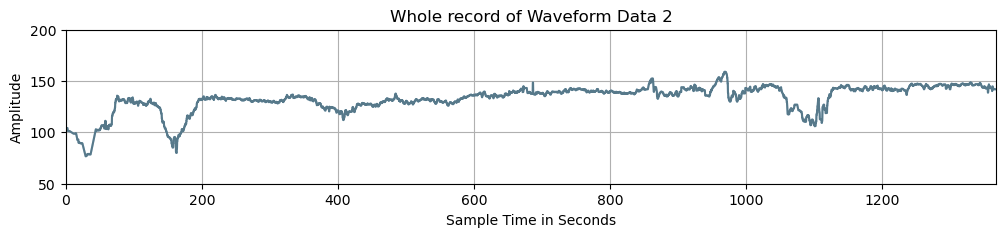

dat/1121


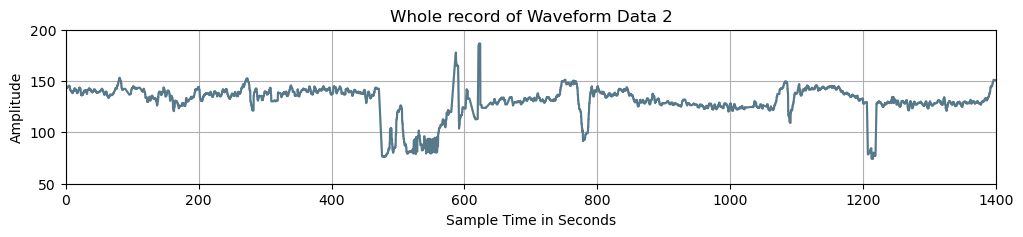

dat/1122


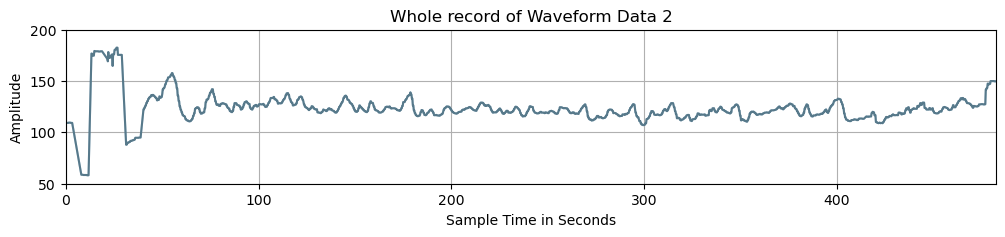

dat/1123


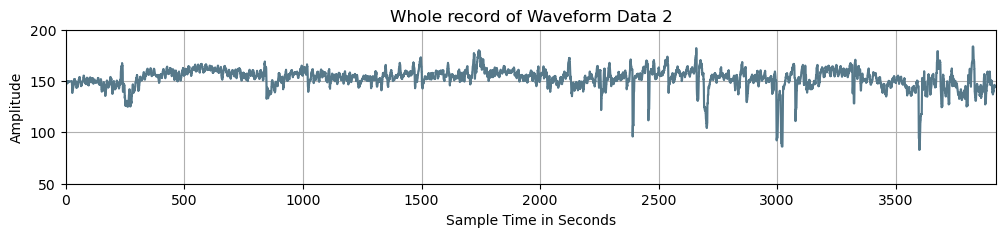

dat/1124


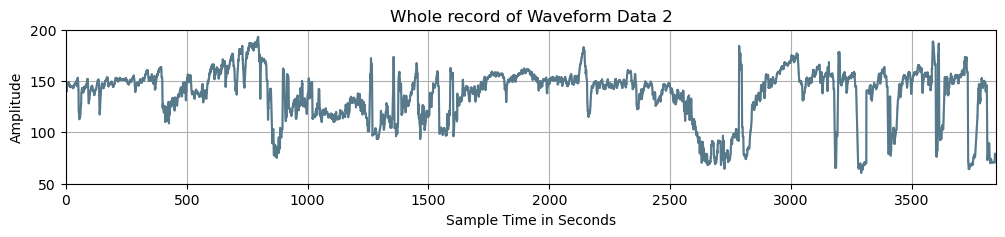

dat/1125


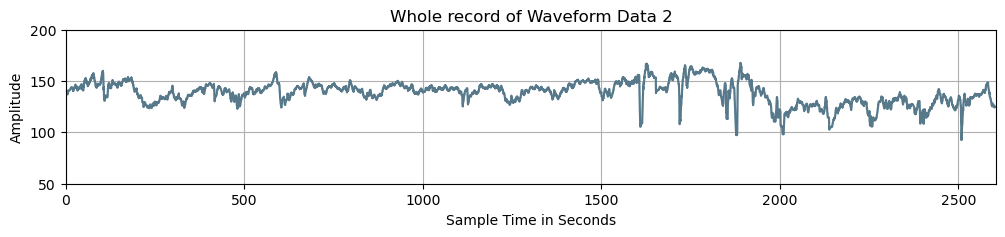

dat/1126


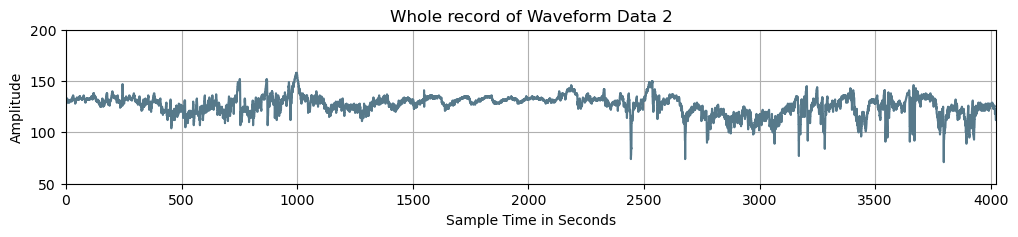

dat/1127


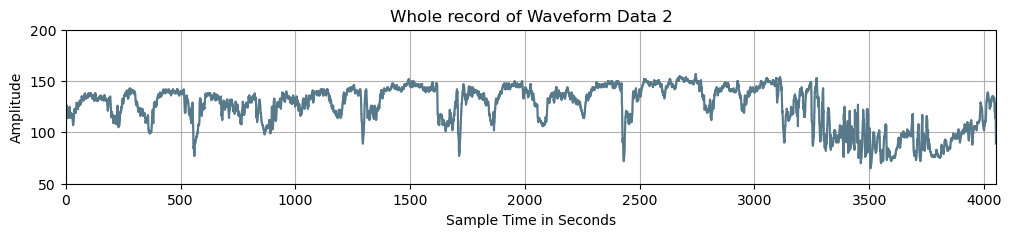

dat/1128


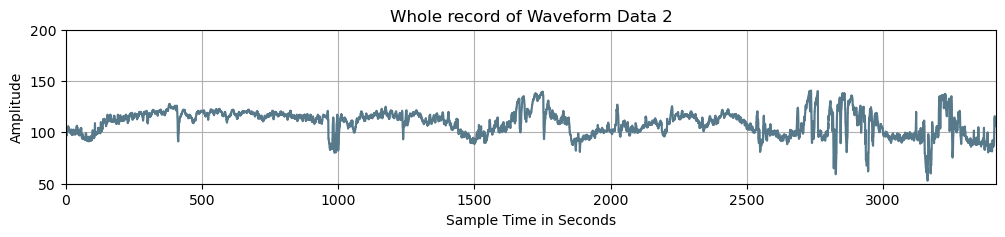

dat/1129


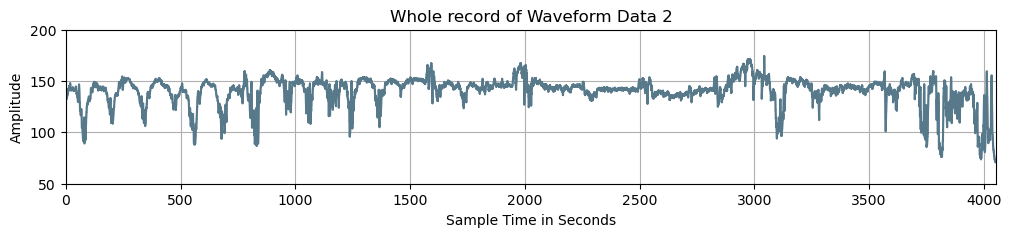

dat/1130


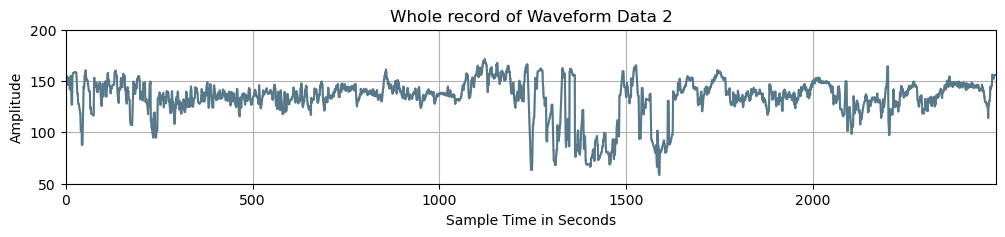

dat/1131


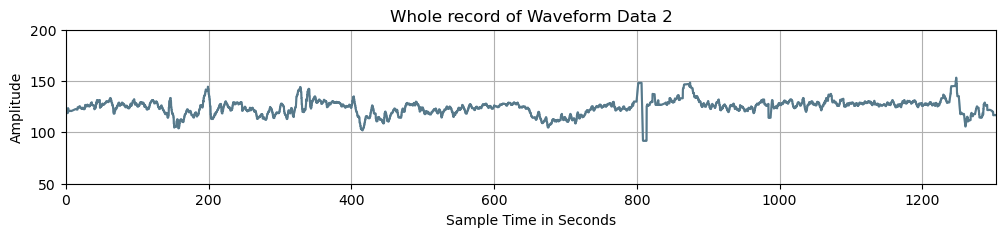

dat/1132


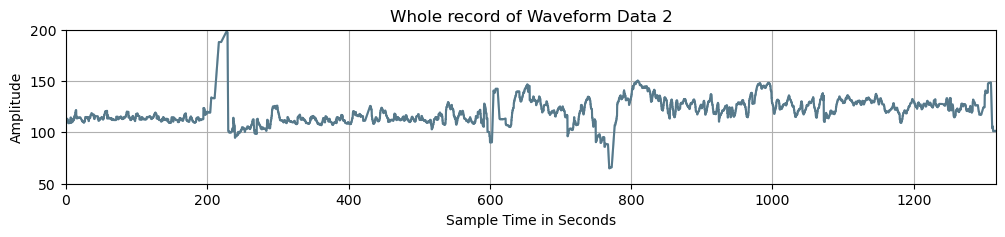

dat/1133


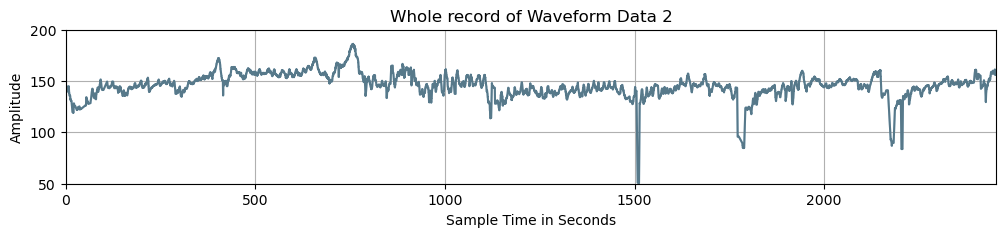

dat/1134


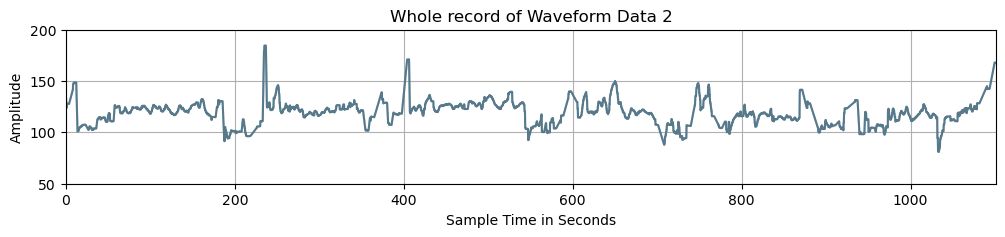

dat/1135


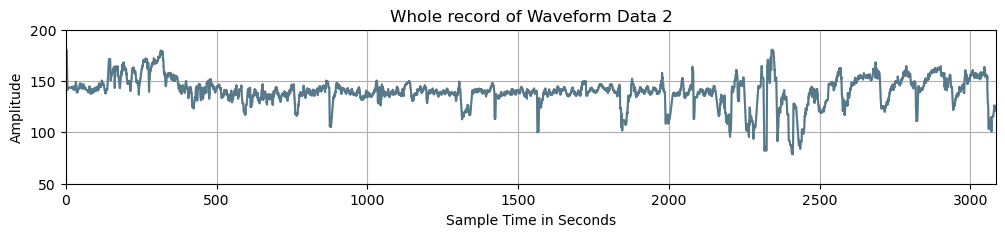

dat/1136


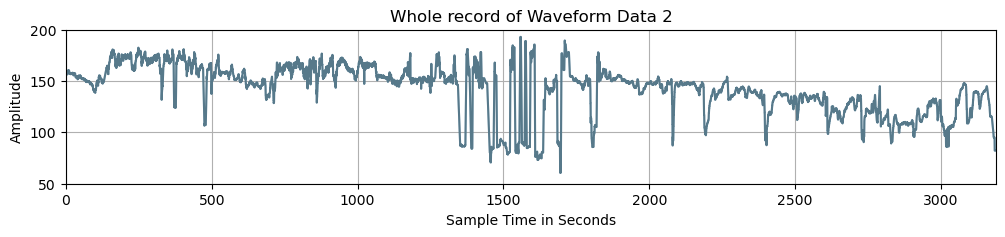

dat/1137


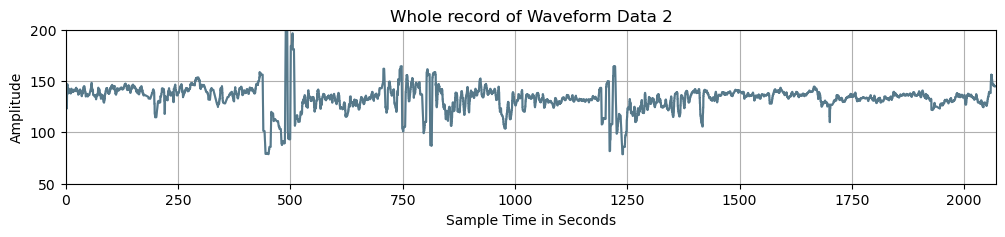

dat/1138


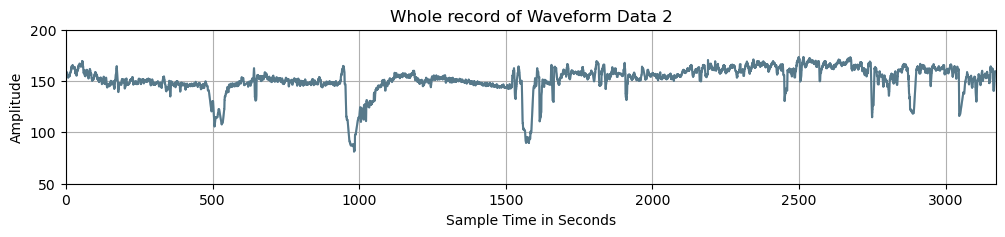

dat/1139


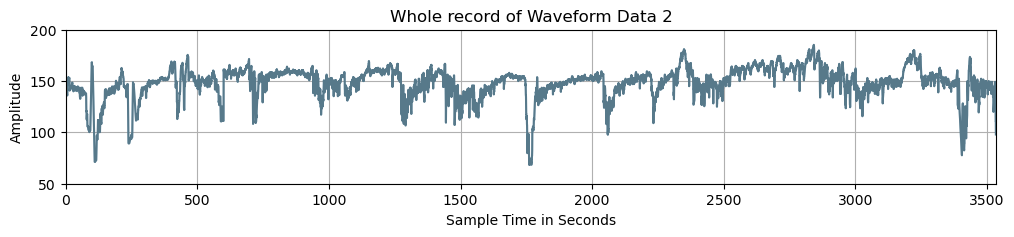

dat/1140


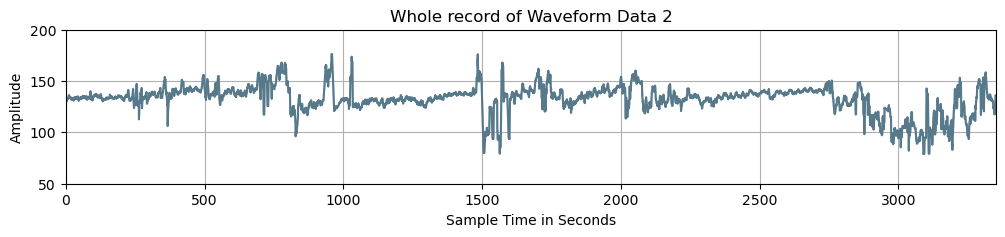

dat/1141


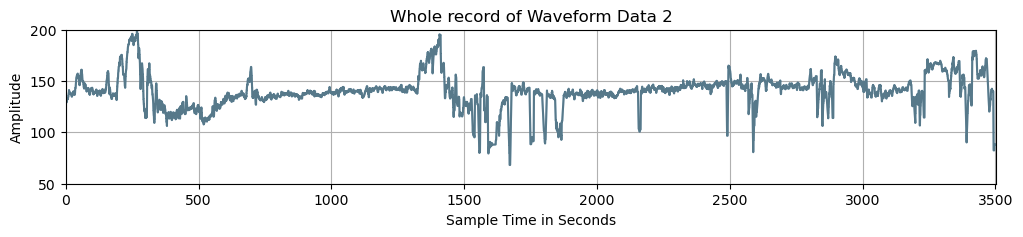

dat/1142


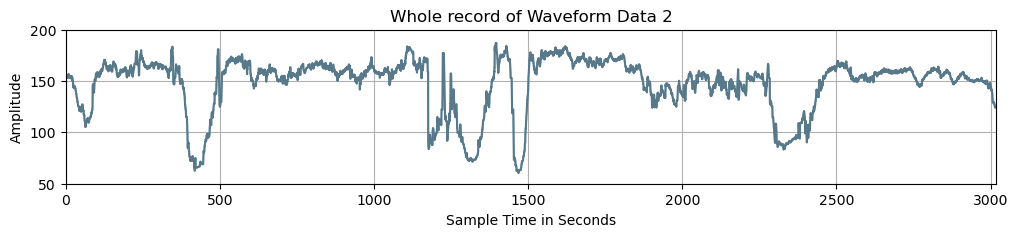

dat/1143


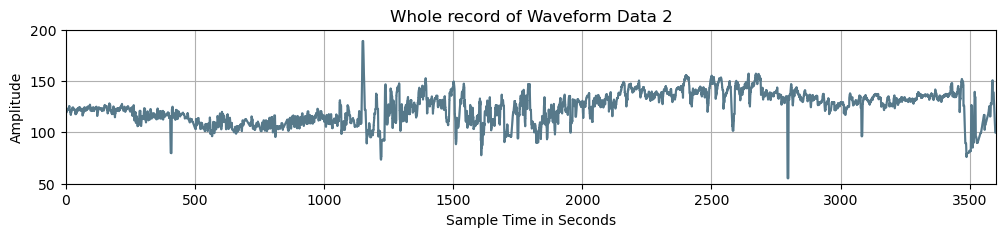

dat/1144


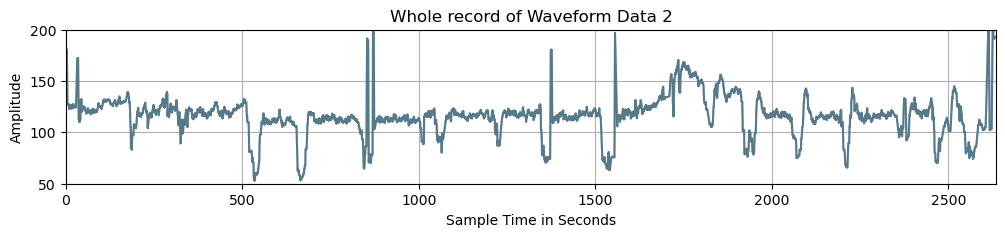

dat/1145


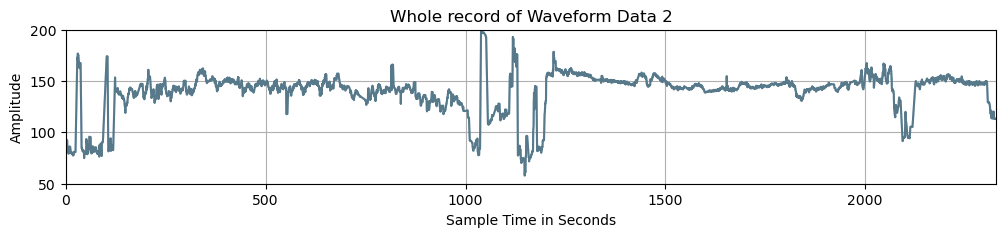

dat/1146


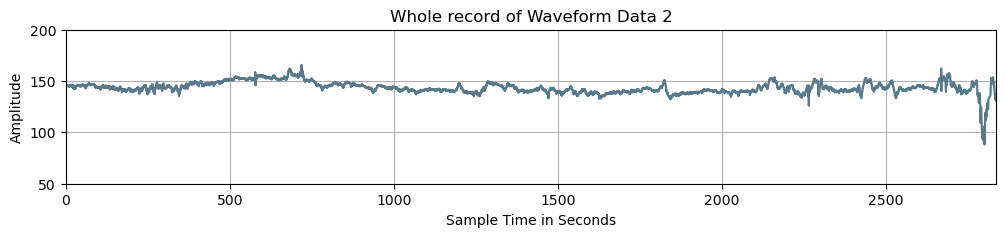

dat/1147


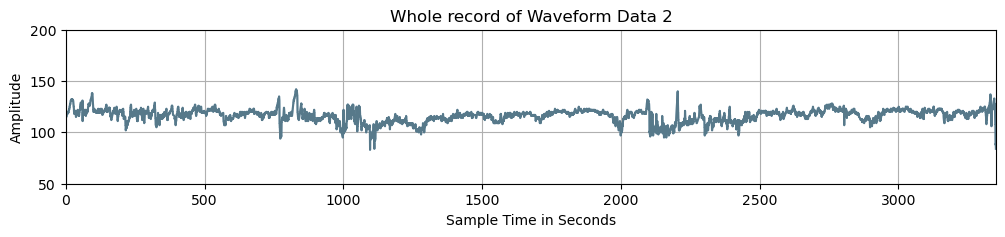

dat/1148


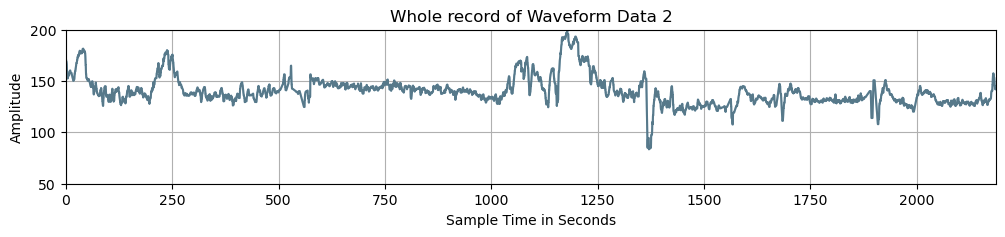

dat/1149


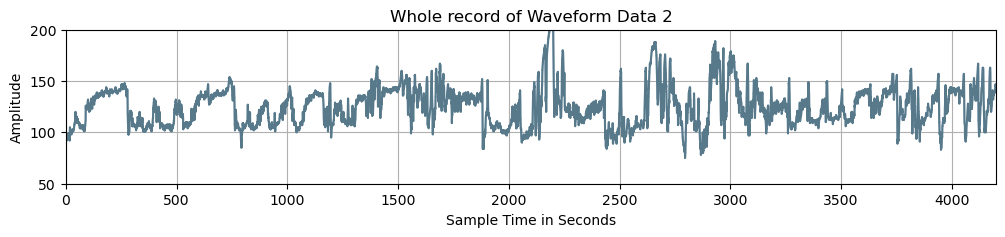

dat/1150


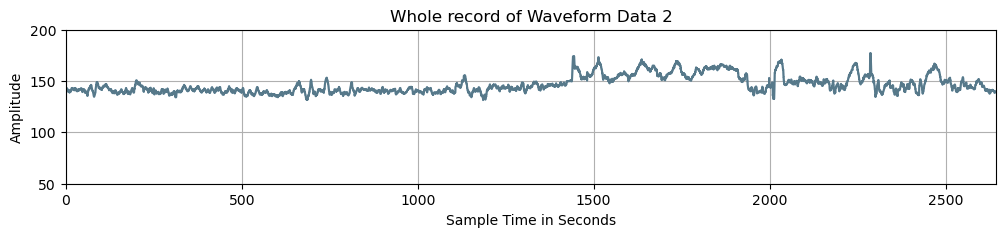

dat/1151


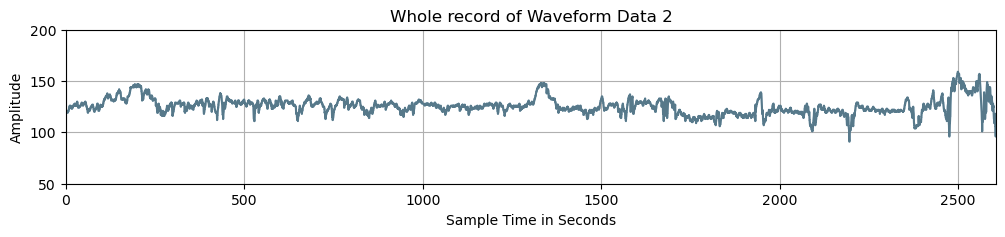

dat/1152


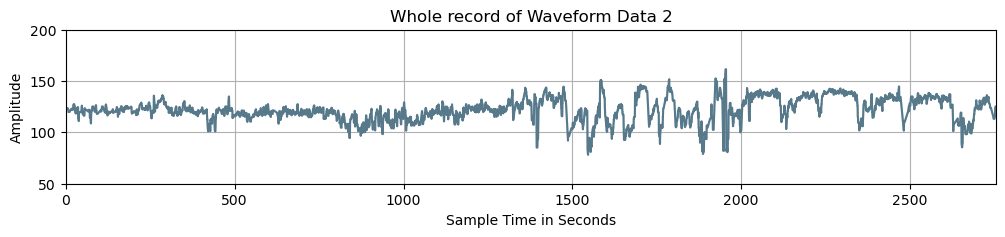

dat/1153


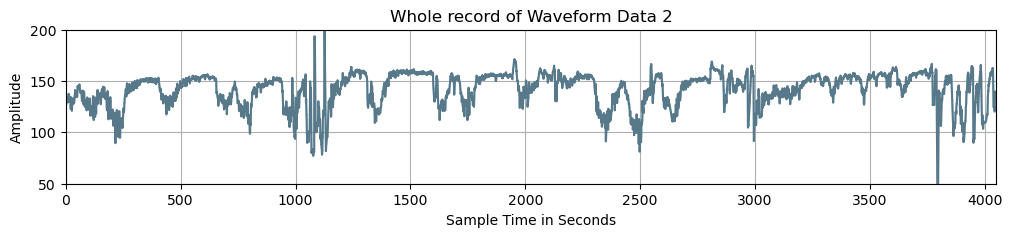

dat/1154


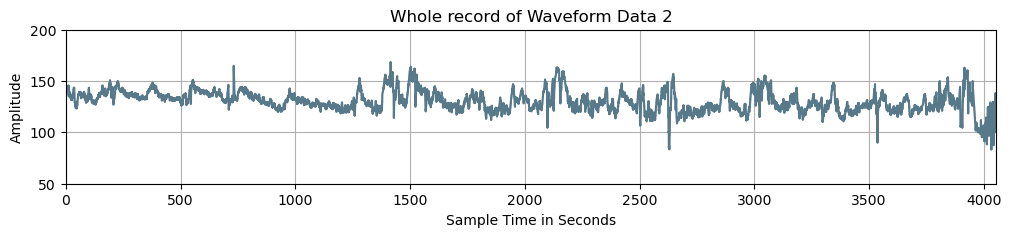

dat/1155


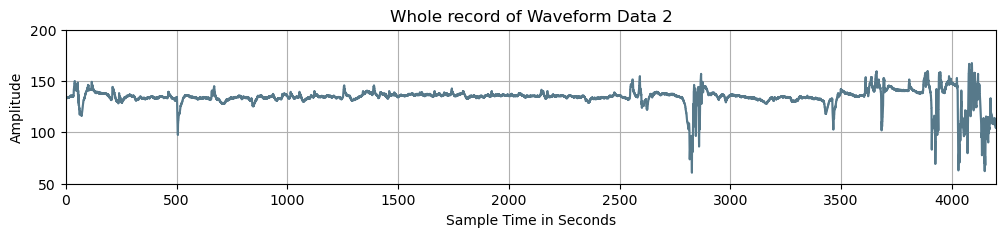

dat/1156


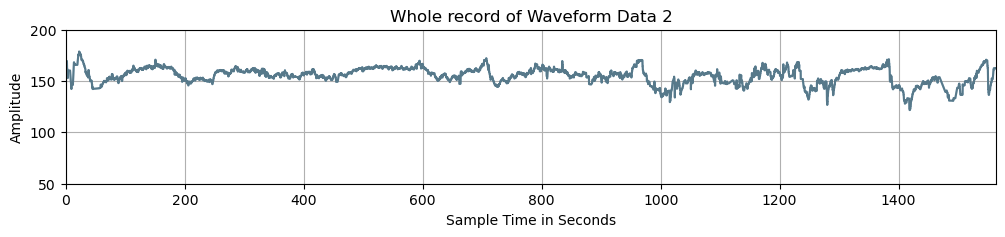

dat/1157


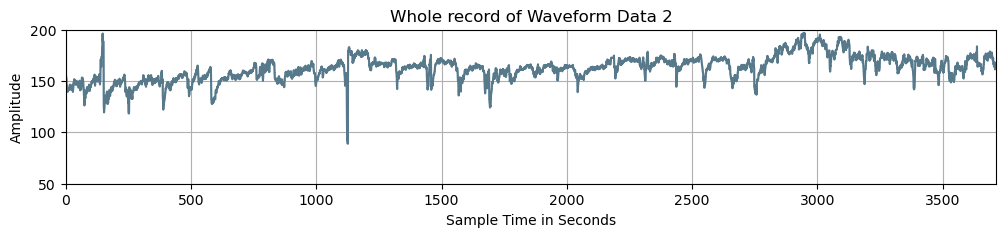

dat/1158


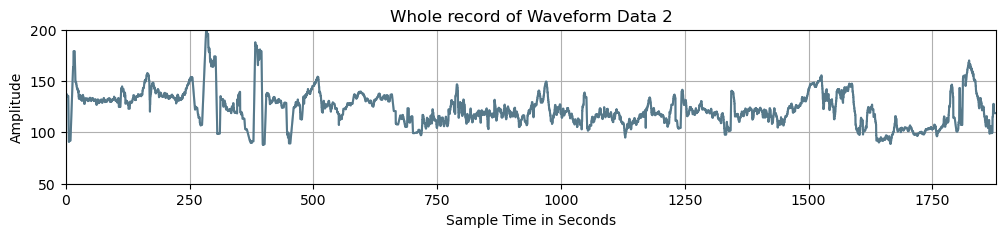

dat/1159


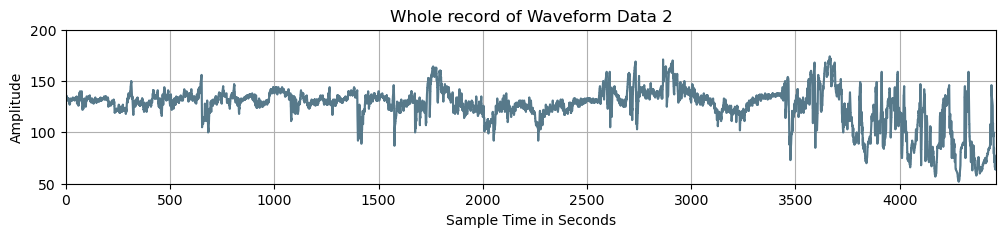

dat/1160


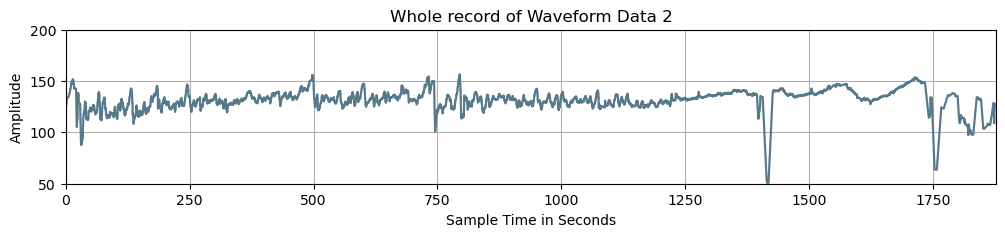

dat/1161


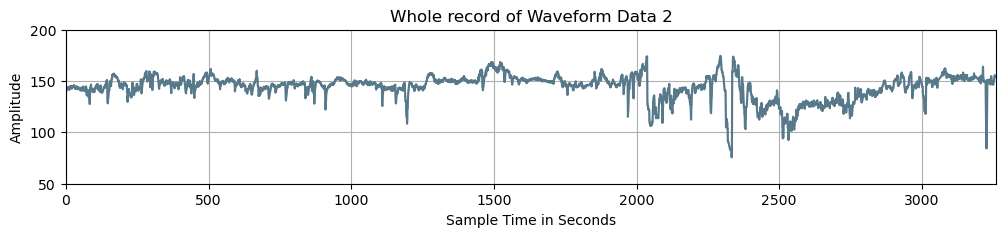

dat/1162


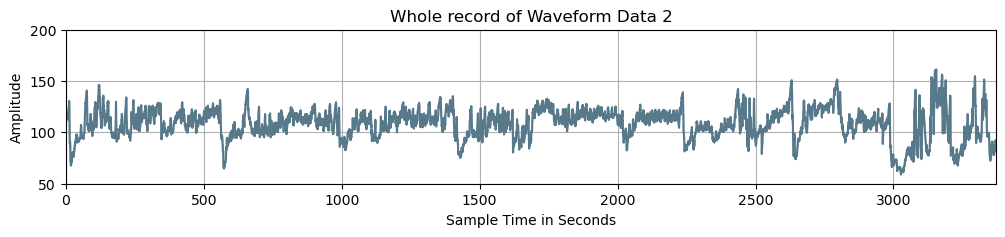

dat/1163


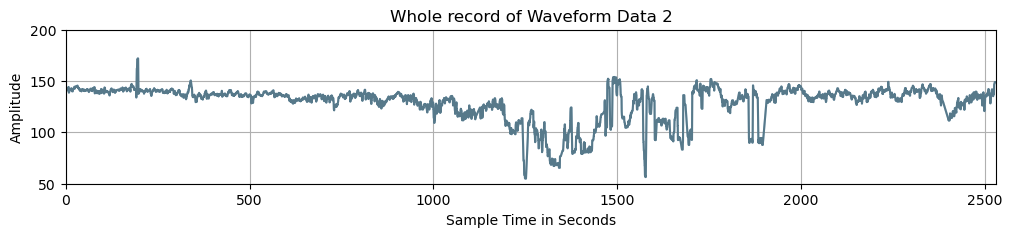

dat/1164


IndexError: index 0 is out of bounds for axis 0 with size 0

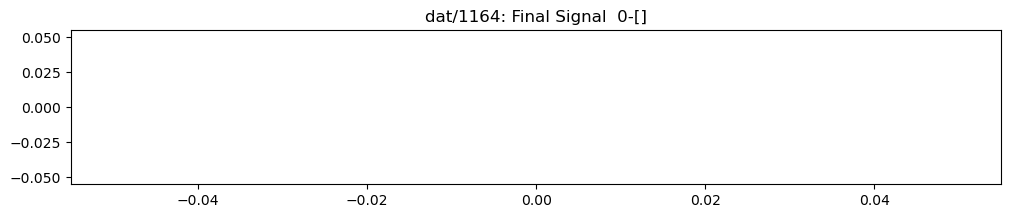

In [9]:
import numpy as np;
import pandas as pd;
import os;
import matplotlib.pyplot as plt;
!pip install wfdb;
import wfdb;

import simple_denoise;
from simple_denoise import get_valid_segments;

def get_recno(dir):
    for f in os.listdir(dir) :
        if os.path.isfile(os.path.join(dir, f)) and f.endswith('.hea'):
            print(f)
            yield f.split('.')[0]

DIR = 'dat/'
recnos = np.loadtxt(DIR+'RECORDS')

recnos = [int(x) for x in recnos]

print(str(recnos[0]))

for ind in recnos:
    FILEPATH = DIR+str(ind)
    
    print(FILEPATH)

    signals, fields = wfdb.rdsamp(FILEPATH)

    # transpose the matrix as originally it was vertical
    signals = np.transpose(signals)

    #print(signals[0])

    fetal_hr = signals[0]

    # the total seconds of the file is the length of the file divided by 4 as it was sampled at 4Hz
    ts = np.arange(len(fetal_hr))/4.0

    #get the valid segments (ie the processed segments without the long gaps)
    selected_segments = get_valid_segments(fetal_hr, ts, FILEPATH, verbose=False,
                                               #max_change=15, verbose_details=True
                                              )
    len_s = len(selected_segments)
    new_signal = []

    #add the segments together for the new processed signal
    for i in range(len_s):
        new_signal.extend(selected_segments[i]['seg_hr'])

    new_time = np.arange(len(new_signal))/4.0

    """"plt.figure(figsize=(12, 2))
    plt.title('{}: Final Signal  {}-{}'.format(FILEPATH, 0, new_time))
    plt.plot(new_time, new_signal)
    plt.plot(new_time, new_signal, alpha=0.25)
    plt.xlim(new_time[0], new_time[-1])
    plt.ylim(50, 200)
    plt.xlabel('Sample Time in Seconds')
    plt.ylabel('Amplitude')
    plt.title('Whole record of Waveform Data 2')
    plt.grid(True)
    plt.show()"""

    #function to write the data
    def write_array_to_dat_file(data_array, file_path):
        with open(file_path, 'w') as file:
            for number in data_array:
                file.write(str(number) + '\n')
                
    #write the data to the new directory
    data = new_signal  
    file_path = 'processed_'+FILEPATH+'.dat'
    write_array_to_dat_file(data, file_path)

    # try_new_signal = np.loadtxt(file_path)
    # print(try_new_signal)
    # print(len(try_new_signal))"""